**PROJECT TEAM ID:** PTID-CDS-DEC-23-1712   
**PROJECT CODE :** PRCP-1013-WalkRunClass  
**PROJECT NAME :** Walking Running Classification

## Business Case : WalkRun Classification Project

- The WalkRun classification project is poised to revolutionize activity monitoring by leveraging motion sensor data to accurately classify walking and running.
- This has significant implications across industries such as healthcare, fitness, sports analytics, and IoT wearables.
- The project’s value extends beyond immediate functionality, offering scalable opportunities such as multi-activity classification, fatigue prediction, and personalized gait analytics. With a focus on privacy, scalability, and accuracy, the model promises seamless deployment across diverse hardware platforms while maintaining user trust through secure data practices
- By addressing user needs for actionable and reliable activity tracking.
- This project not only enhances user experience but also opens up revenue streams through device licensing, SaaS platforms, and premium subscription services, ultimately driving innovation and profitability in the digital health and fitness ecosystem.



![Walk Run Image](../Images/walk_rum_Image.webp)



In [2]:
! pip install xgboost  --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [3]:
## Importing the required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,roc_auc_score
from sklearn.preprocessing import MinMaxScaler 

#warnings
import warnings
warnings.filterwarnings('ignore')

#setting notebook style
sns.set_style('darkgrid')
pd.set_option("display.max_columns",None)


In [4]:
Data=pd.read_csv('walkrun.csv')
Data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## Domain Analysis

### Domain Analysis Elaborated by Dataset Attributes

The **WalkRun dataset** consists of motion sensor data captured during walking and running activities. Each attribute provides critical insights into human movement and has specific relevance to the domains of healthcare, fitness, and wearable technology. Below is an attribute-wise analysis:

#### **1. Date and Time** :
-  Contains Timestamps of recorded activities.  
- Enables the analysis of temporal patterns in user activity, such as daily exercise routines or variations across time.
- Supports personalized insights by identifying the most active or sedentary periods.  
- In healthcare, time-specific activity levels can help monitor recovery progress (e.g., morning vs. evening mobility post-surgery).



#### **2. Username** :
- Unique identifier for individual users.  
- Allows for user-specific analysis, accounting for variations in gait patterns, stride lengths, and activity intensity.
- Critical for personalizing fitness programs or healthcare interventions.
- Enables tracking long-term behavior changes and adherence to prescribed physical activities.



#### **3. Wrist** :
- Indicates the sensor placement (assumed on the wrist i.e Left/Right ).  
- ensuring applicability to smartwatches or fitness bands.


#### **4. Activity** :
- Target variable indicating whether the person is walking or running.  
- Core to activity classification models, determining the use cases for fitness tracking and health monitoring.
- Identifying activity types is essential for caloric expenditure estimation, gait analysis, and injury prevention.
- In rehabilitation, distinguishing between walking and running can help ensure adherence to recovery protocols.


#### **5. Acceleration (x, y, z)** :
-  3-axis acceleration readings from motion sensors.  
- Provides raw motion data to capture movement intensity and direction.
- Enables the calculation of derived features like acceleration magnitude or stride frequency, crucial for accurate activity classification.
- In healthcare, irregular acceleration patterns can indicate mobility issues or risks of falls.
- For fitness, these metrics help analyze the efficiency of movements, optimize running techniques, and improve performance.


#### **6. Gyroscope (x, y, z)** :
- 3-axis angular velocity readings indicating rotational movements.  
- Captures fine-grained movement details, such as wrist rotation during walking or running.
- Complements acceleration data to provide a comprehensive motion profile.
- Useful for detecting abnormal movement patterns in healthcare applications, such as tremors in patients with neurological conditions.
- In sports analytics, gyroscope data can assess biomechanical efficiency and refine athletic training programs.



### Integration of Attributes for Domain Applications :

-  **Healthcare :**  
     - Monitor walking recovery post-surgery.  
     - Attributes like `acceleration_x`, `gyro_x, and` ,`activity` can identify improvements in gait over time.  
     - The `username` attribute ensures personalized feedback for patients.  

- **Fitness :**  
     - Enhance fitness tracking in wearables.  
     - Sensor readings combined with `activity` allow for precise step counts, calorie calculations, and intensity tracking.  
     - The `time` attribute identifies when users are most active, enabling goal-setting.

- **Wearable Technology :**  
     - Real-time activity detection in smartwatches.  
     - Attributes like `acceleration` and `gyro` provide inputs for edge computing algorithms.  
     - `Wrist` placement ensures the relevance of sensor orientation during deployment.
   
By integrating this model into wearable devices, businesses can deliver advanced, AI-driven features, creating a competitive edge in the growing wearable market, projected to expand at a CAGR of 20%+ over the next five years.

![Activity Plot](..\Images\gyro_accelerometer_sensor.webp)



## Basic Checks

In [5]:
# Knowing the Information of the Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
# Getting the Statistical Information of Numarical Attributes
Data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [7]:
# Getting the Statistical Information of Categorical Attributes
Data.describe(include='O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


**As UserName has only one unique values which won't give any semantic informtion so, we're going to Drop the username Columns**

In [8]:
# Droping Irrelavent Column which doesn't have any significance in prediction 
Data.drop('username',axis=1,inplace=True)

In [9]:
# Checking the Value Counts of each Attribute.
for i in Data:
    print(f'{Data[i].value_counts()} \n\n  Number of distinct Values in {i} : {len(Data[i].value_counts())} \n {'**'* 50}\n')

date
2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: count, dtype: int64 

  Number of distinct Values in date : 12 
 ****************************************************************************************************

time
13:51:15:847724020    1
19:34:29:79468011     1
19:34:37:706730008    1
19:34:37:506595015    1
19:34:37:307013988    1
                     ..
14:45:22:828522980    1
14:45:22:629136979    1
14:45:22:429431974    1
14:45:22:229138970    1
20:9:16:117410004     1
Name: count, Length: 88588, dtype: int64 

  Number of distinct Values in time : 88588 
 ****************************************************************************************************

wrist
1    46258
0    42330
Name: count, dtype: int64 

  Number of distinct Values in wrist : 2 
 ***********************************

In [10]:
# Checking the Null values in the Data
Data.isna().sum()

date              0
time              0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

**There are not even a single Null value present in the Data**

## EDA(Exploratory Data Analysis) :

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing datasets to uncover patterns, detect anomalies, check assumptions, and summarize key characteristics. The EDA consists of
1) Univariate Analysis
2) Bivariate Analysis

**Univariate Analysis :**
Univariate analysis is the examination of one variable at a time to understand its distribution, central tendency, and spread.
- ***Histogram :*** A histogram is a graphical representation of the distribution of a numerical variable. It groups data into bins and displays the frequency of values in each bin.
- ***Countplot :*** A countplot is a type of bar plot that shows the count of observations in each categorical bin using bars.
- ***Boxplot :*** A boxplot (also called a box-and-whisker plot) is a statistical visualization that displays the distribution of a dataset based on IQR, it also show outliers as individual points beyond the whiskers.

**Bivariate Analysis :**
Bivariate analysis is a type of statistical analysis that involves examining the relationship between two variables and it is commonly used to identify patterns, correlations, or dependencies between the two variables.
- ***Heatmap :*** A heatmap is a graphical representation of data where individual values are represented using a color gradient. It's commonly used to visualize correlation matrices, frequency tables, and feature relationships.

### Univariate Analysis

In [11]:
# Splitting the Data into Categorical , Numarical, and Time columns
Numerical_Attributes = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
Categorical_Attributes = ['date', 'wrist', 'activity']
Time_Attribute=['time']

In [13]:
# Draw a histogram for poltting the distribution of Numerical columns
def plot_Univariate_histograms(data , numerical_columns,cols=3):
        """
        Plots histograms for numerical columns in the dataset using Matplotlib's Axes.
    
        Parameters:
        - data: DataFrame containing the data
        - numerical_columns: List of numerical column names to plot
        - cols: Number of columns in the subplot grid (default is 3)
    
        Returns:
        - fig: The Matplotlib figure object
        - axes: Array of Matplotlib Axes objects
        """
        rows = len(numerical_columns) // cols + (1 if len(numerical_columns) % cols != 0 else 0)
        num_fig, num_axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  # Adjust size as needed
        num_axes = num_axes.flatten()  # Flatten in case of multiple rows and columns
    
        for i, col in enumerate(numerical_columns):
            sns.histplot(data=data, x=col, ax=num_axes[i],kde=True)  # Use `ax` to specify the subplot
            num_axes[i].set_title(f"Distribution of {col}")
        
        # Hide unused subplots
        for j in range(i + 1, len(num_axes)):
            num_axes[j].set_visible(False)
        
        plt.tight_layout()
        return num_fig, num_axes


In [14]:
# plotting Numerical Attributes using  pipeline 
def numerical_data_Univariate_visualization(data , numerical_columns):
    """
    Executes a data visualization pipeline for numerical columns.

    Parameters:
    - data: DataFrame containing the dataset
    - numerical_columns: List of numerical column names
    """
    fig, axes = plot_Univariate_histograms(data , numerical_columns)
    # Display plots
    plt.show()  



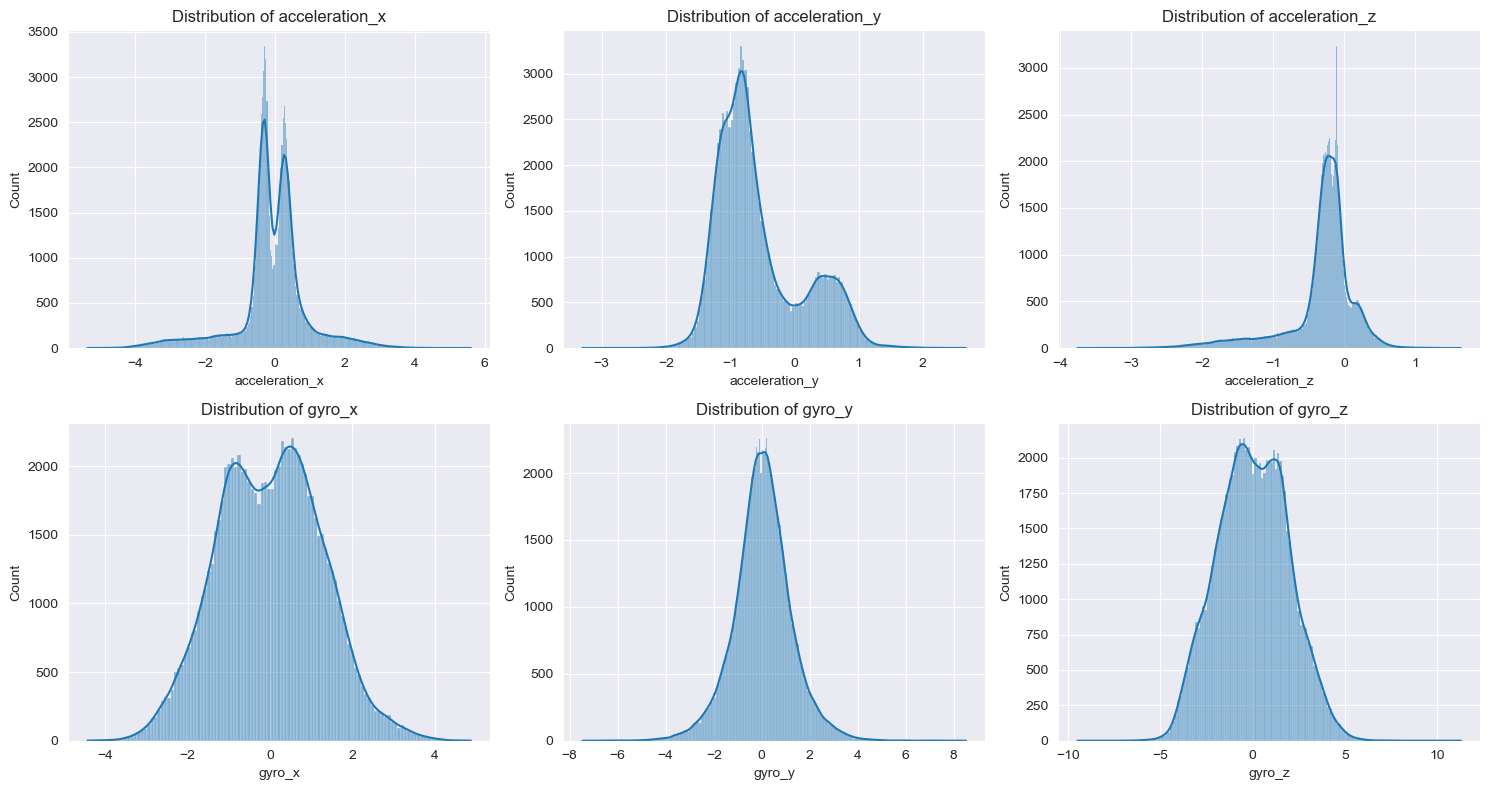

In [15]:
#  Plot Using Nuramrical Columns
numerical_data_Univariate_visualization(Data, Numerical_Attributes)

- The distributions show variability in acceleration values across the three axes, which is expected in real-world motion data.
- The skewness in the distributions of acceleration in three axis(x,y,z) suggests that extreme values (either positive or negative) are less frequent than values closer to zero.
- The tails of the distribution of accelerations in three axis(x,y,z) may indicate outliers or rare events.
- The distributions of gyroscope are centered around zero, suggesting that the sensor often records little to no rotation.
- The variability in the distributions of gyroscope in three axis(x,y,z) indicates the presence of rotational motion, with some values extending to higher magnitudes.
- The tails of the distributions of gyroscope in three axis(x,y,z) may indicate rare or extreme rotational events.

In [16]:
# checking Skewness of the Numerical data distribution
for col in Numerical_Attributes:
    print(f'Skewness of {col} : {Data[col].skew()}')
    

Skewness of acceleration_x : -0.6209928906536413
Skewness of acceleration_y : 0.9077471275417984
Skewness of acceleration_z : -1.8377736726281553
Skewness of gyro_x : 0.06908234482200133
Skewness of gyro_y : -0.023932070195713858
Skewness of gyro_z : 0.04173247260382652


**The ideal skewness is in the range between -0.5 and 0.5**.
- **Here the plot and skewness values clearly show that acceleration_x, acceleration_y and acceleration_z has a bit skewness**

In [17]:
# plotting count plot for Categorical Attributes
def plot_Univariate_countplots(data, categorical_columns, cols=1, xtick_rotation=0, ylabel="Count"):
    """
    Plots count plots for categorical columns in the dataset with annotations, xticks, x-axis labels, and y-axis labels.

    Parameters:
    - data: DataFrame containing the data
    - categorical_columns: List of categorical column names to plot
    - cols: Number of columns in the subplot grid (default is 3)
    - xtick_rotation: Rotation angle for xticks (default is 0)
    - xlabel: Label for the x-axis (default is 'Category')
    - ylabel: Label for the y-axis (default is 'Count')

    Returns:
    - cat_fig: The Matplotlib figure object
    - cat_axes: Array of Matplotlib Axes objects
    """
    rows = len(categorical_columns) // cols + (1 if len(categorical_columns) % cols != 0 else 0)
    cat_fig, cat_axes = plt.subplots(rows, cols, figsize=(cols * 25, rows * 8))  # Adjust size as needed
    cat_axes = cat_axes.flatten()  # Flatten in case of multiple rows and columns
    
    for i, col in enumerate(categorical_columns):
        # Create countplot
        sns.countplot(data=data, x=col, ax=cat_axes[i])
        cat_axes[i].set_title(f"Distribution of {col}",fontsize=25)
        
        # Annotate bar counts
        for p in cat_axes[i].patches:  # Iterate over bars
            count = int(p.get_height())  # Get the height of the bar
            if count > 0:  # Annotate only if count is non-zero
                cat_axes[i].annotate(
                    f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # X and Y position
                    ha='center', 
                    va='bottom', 
                    fontsize=10, 
                    color='black'
                )
        
        # Add labels and rotate xticks
        cat_axes[i].set_xlabel(col, fontsize=20)
        cat_axes[i].set_ylabel(ylabel, fontsize=20)
        cat_axes[i].tick_params(axis='x', rotation=xtick_rotation)  # Rotate xticks
    
    # Hide unused subplots
    for j in range(i + 1, len(cat_axes)):
        cat_axes[j].set_visible(False)
    
    plt.tight_layout()
    return cat_fig, cat_axes




In [18]:
# plotting categorical using  pipeline 
def categorical_data_Univariate_visualization(data, categorical_columns):
    """
    Executes a data visualization pipeline for numerical columns.

    Parameters:
    - data: DataFrame containing the dataset
    - numerical_columns: List of numerical column names
    """
    fig, axes = plot_Univariate_countplots(data, categorical_columns)
    plt.show()  # Display plots

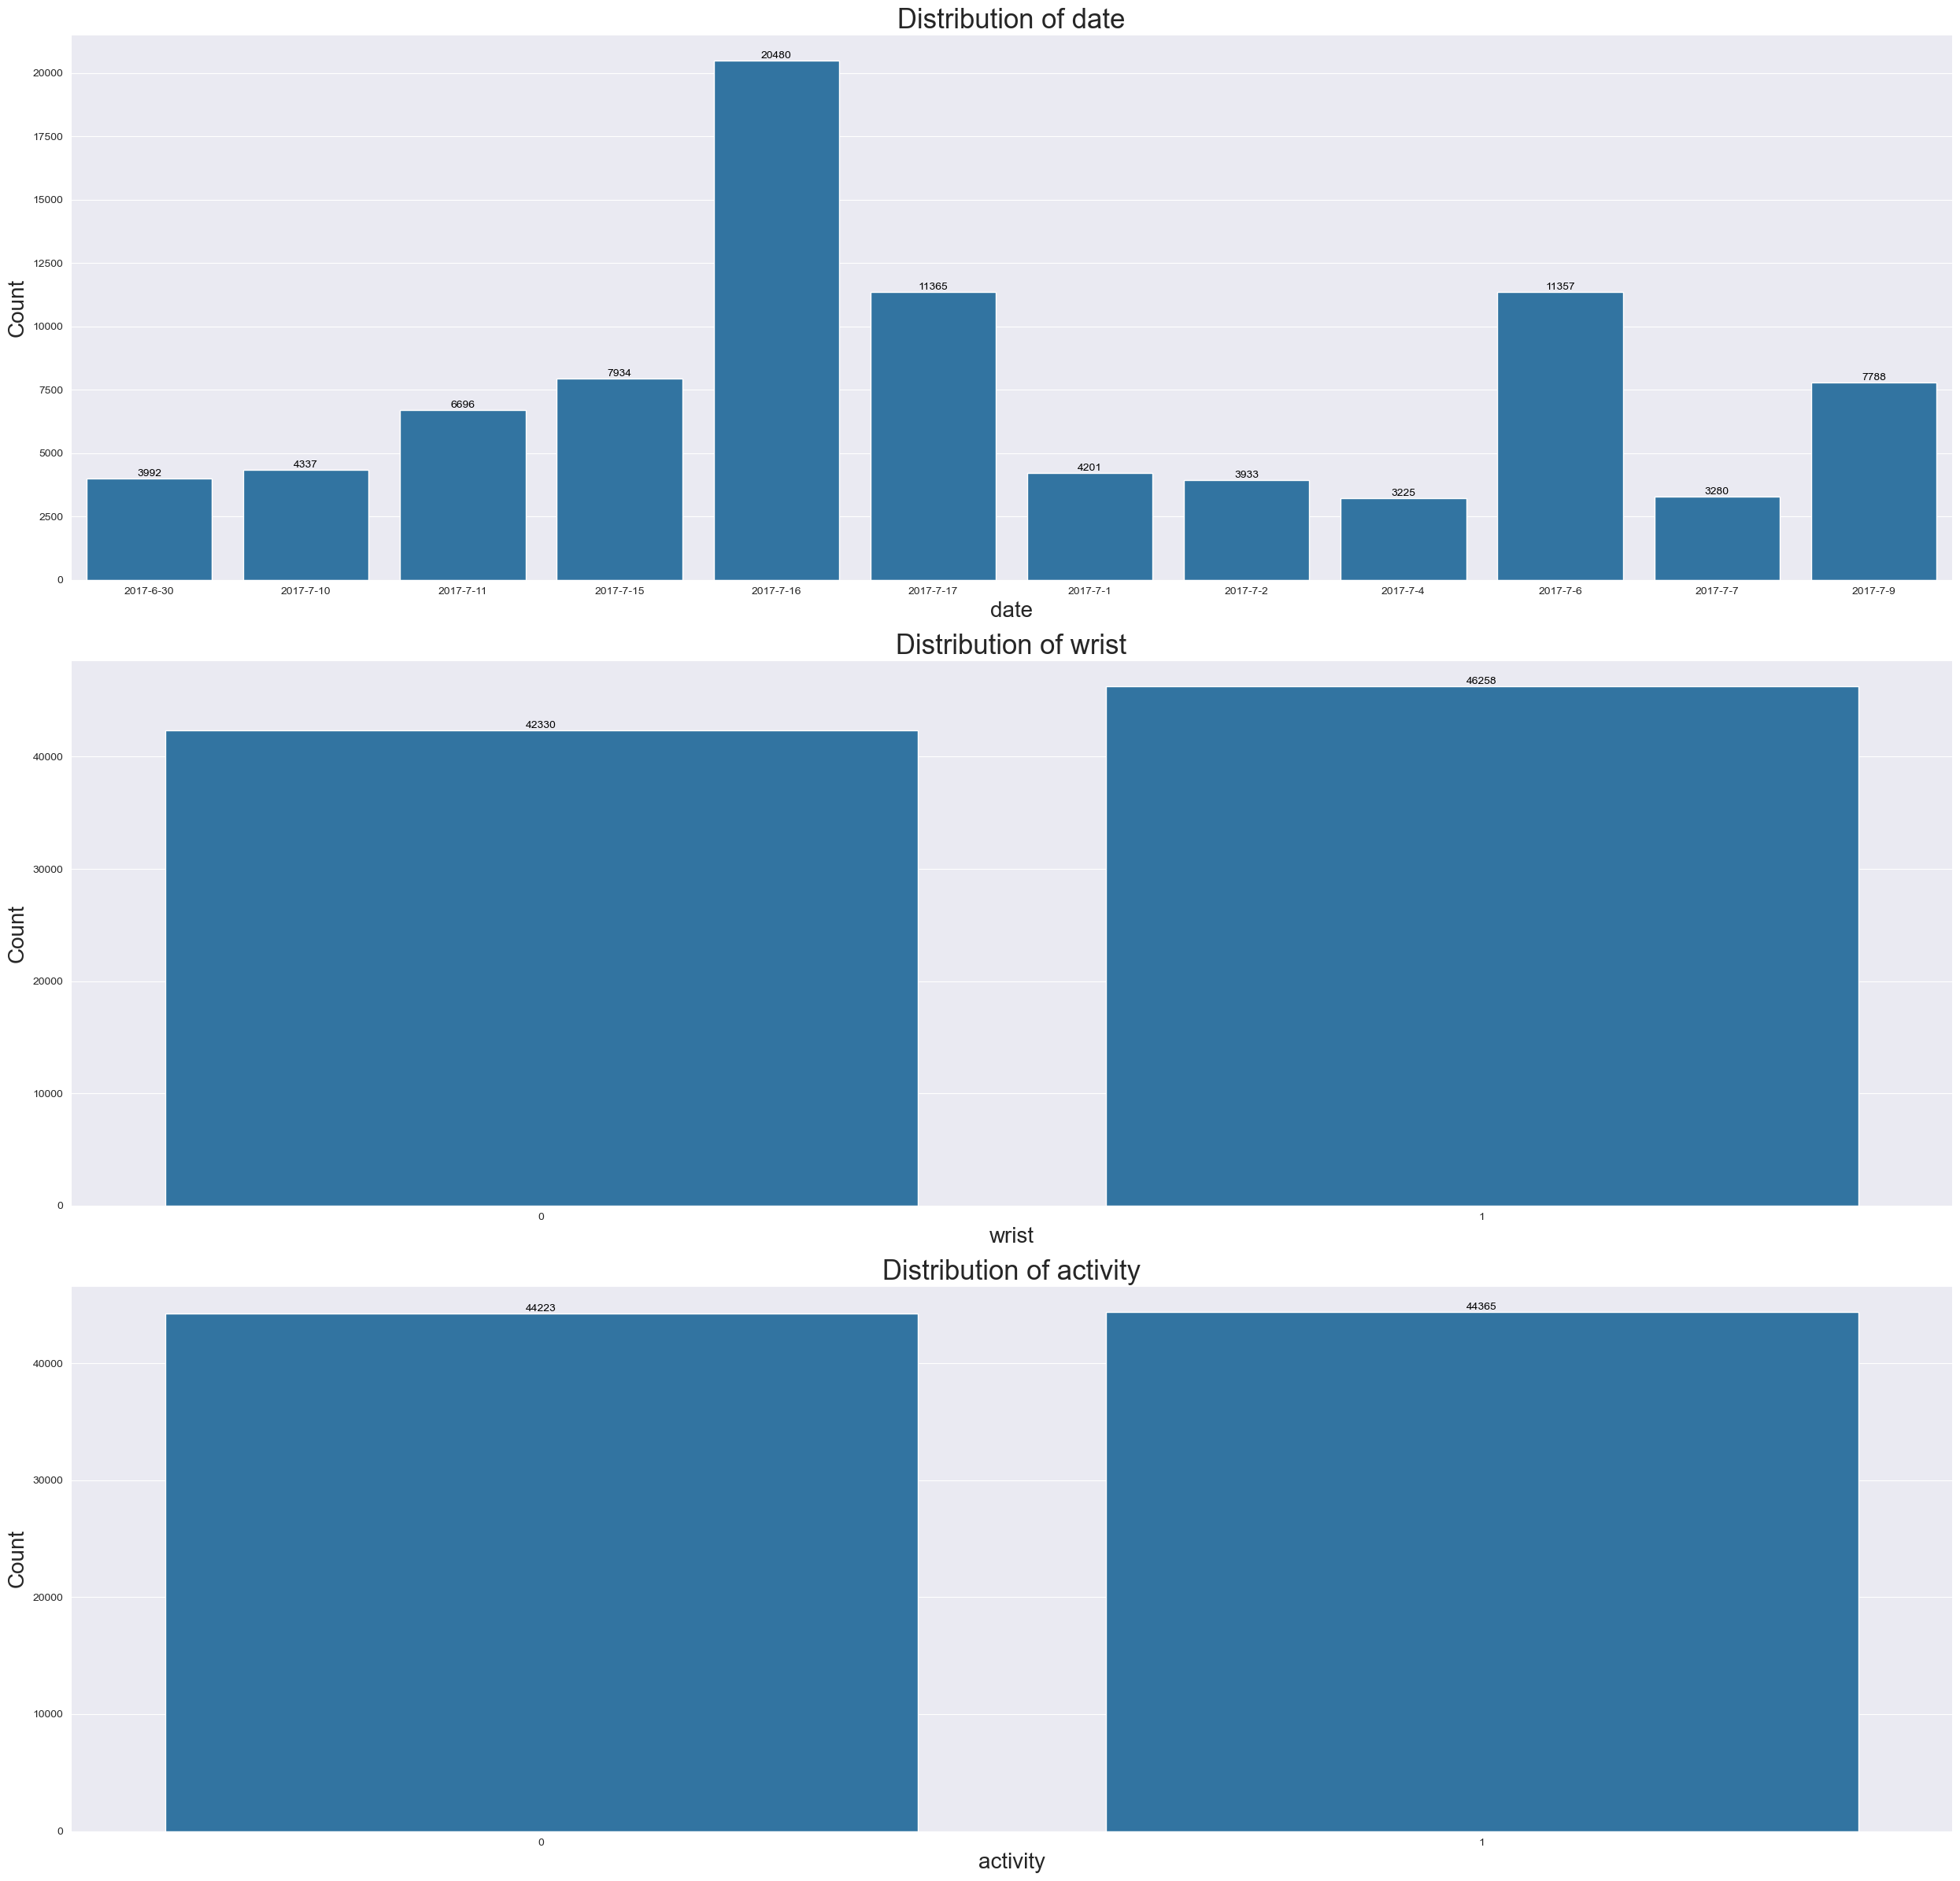

In [19]:
categorical_data_Univariate_visualization(Data, Categorical_Attributes)

- The sensor recorded the highest amount of data (23%) on 16-07-2017, a Sunday, suggesting that the individual is focusing on their health by engaging in walking and running activities on this day.
- The majority of the data was captured on three dates 06-07-2017, 16-07-2017, and 17-07-2017 which together account for 49% of the total data. This indicates that the individual tends to walk or run regularly, regardless of the specific day.
- The sensor was predominantly worn on the individual's right hand, either as part of a smartwatch or smartphone.
- The individual engaged in walking and running activities in roughly equal proportions.

#### Checking Outliers

In [20]:
# Draw a histogram for poltting the distribution of Numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outlier_boxplot(data, numerical_columns, cols=3):
    """
    Plots boxplots for numerical columns in the dataset to identify outliers.
    
    Parameters:
    - data: DataFrame containing the data
    - numerical_columns: List of numerical column names to plot
    - cols: Number of columns in the subplot grid (default is 3)
    
    Returns:
    - fig: The Matplotlib figure object
    - axes: Array of Matplotlib Axes objects
    """
    rows = len(numerical_columns) // cols + (1 if len(numerical_columns) % cols != 0 else 0)
    num_fig, num_axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  # Adjust size as needed
    num_axes = num_axes.flatten()  # Flatten in case of multiple rows and columns
    
    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=data, x=col, ax=num_axes[i])  # Use `ax` to specify the subplot
        num_axes[i].set_title(f"Outliers in {col}")
        num_axes[i].set_xlabel("")  # Optionally remove x-axis label for clarity
    
    # Hide unused subplots
    for j in range(i + 1, len(num_axes)):
        num_axes[j].set_visible(False)
    
    plt.tight_layout()
    # return num_fig, num_axes
    plt.show()


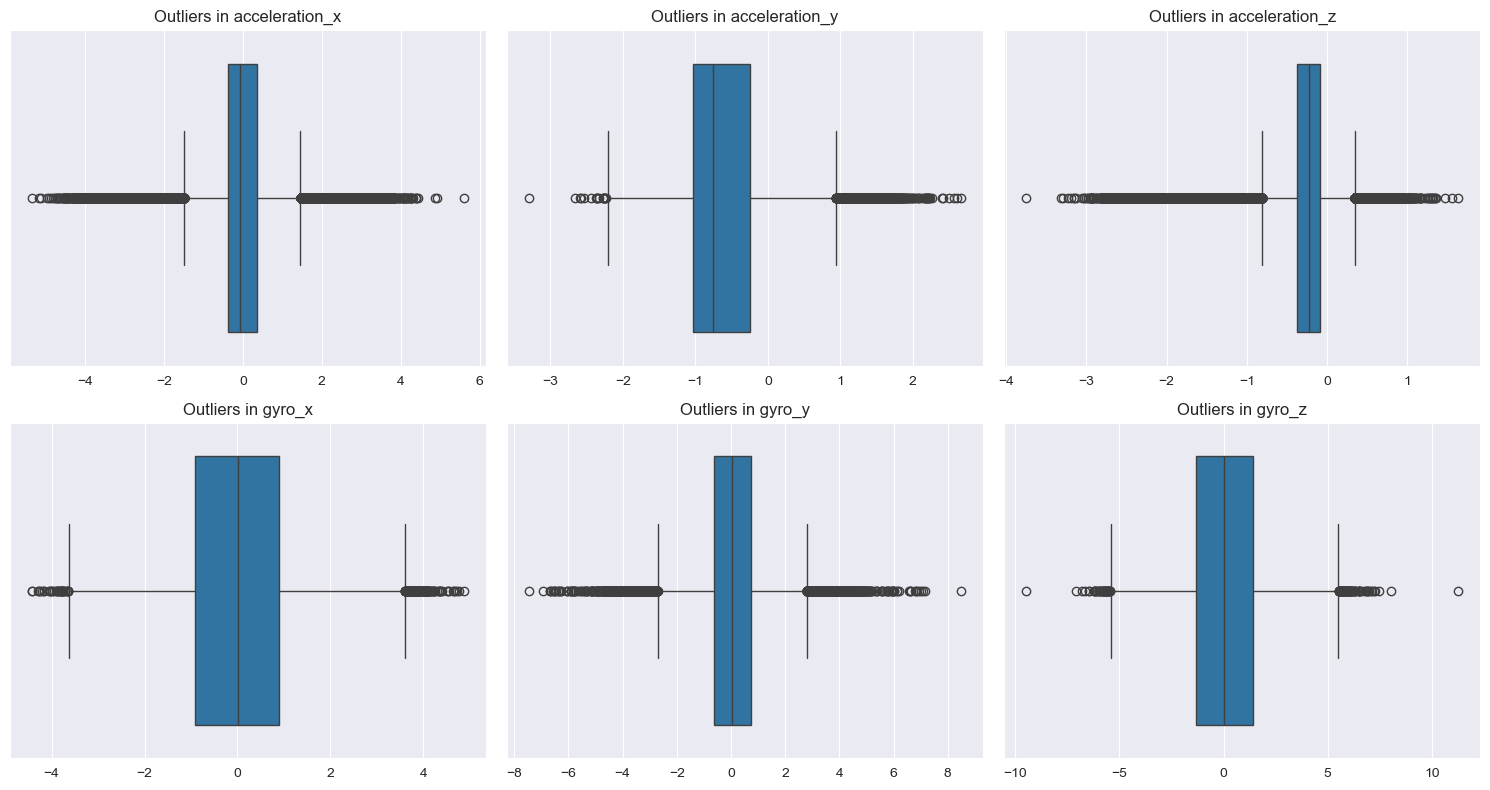

In [21]:
plot_outlier_boxplot(Data, Numerical_Attributes, cols=3)

- The observed box plots suggest that the dataset contains significant outliers across all acceleration (x, y, z) and gyroscope (x, y, z) axis variables.
- These outliers may indicate noise, anomalies, or significant events in the sensor data.
- However, most of the detected points should not be considered true outliers due to the following reasons:
    1) Since the data is derived from human activity, sudden spikes in acceleration or angular velocity are expected.
    2) High-frequency movements, such as impacts or abrupt direction changes, can naturally result in high values.
    3) If the sensor has a high sensitivity range, these extreme values may still fall within its normal operational limits.
- Only a few actual outliers are present in each attribute, and they will be addressed during data preprocessing.

### Bivariate Analysis

In [23]:
# Draw a histogram for poltting the distribution of Numerical columns
def plot_Bivariate_histograms(data,numerical_columns,cols=3):
        """
        Plots histograms for numerical columns in the dataset using Matplotlib's Axes.
    
        Parameters:
        - data: DataFrame containing the data
        - numerical_columns: List of numerical column names to plot
        - cols: Number of columns in the subplot grid (default is 3)
    
        Returns:
        - fig: The Matplotlib figure object
        - axes: Array of Matplotlib Axes objects
        """
        rows = len(numerical_columns) // cols + (1 if len(numerical_columns) % cols != 0 else 0)
        num_fig, num_axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  # Adjust size as needed
        num_axes = num_axes.flatten()  # Flatten in case of multiple rows and columns
    
        for i, col in enumerate(numerical_columns):
            sns.histplot(data=data, x=col, ax=num_axes[i],kde=True,hue=data['activity'])  # Use `ax` to specify the subplot
            num_axes[i].set_title(f"Distribution of {col}")
        
        # Hide unused subplots
        for j in range(i + 1, len(num_axes)):
            num_axes[j].set_visible(False)
        
        plt.tight_layout()
        return num_fig, num_axes


In [24]:
# plotting Numerical Attributes using  pipeline 
def numerical_data_Bivariate_visualization(data, numerical_columns):
    """
    Executes a data visualization pipeline for numerical columns.

    Parameters:
    - data: DataFrame containing the dataset
    - numerical_columns: List of numerical column names
    """
    fig, axes = plot_Bivariate_histograms(data , numerical_columns)
    # Display plots
    plt.show()  



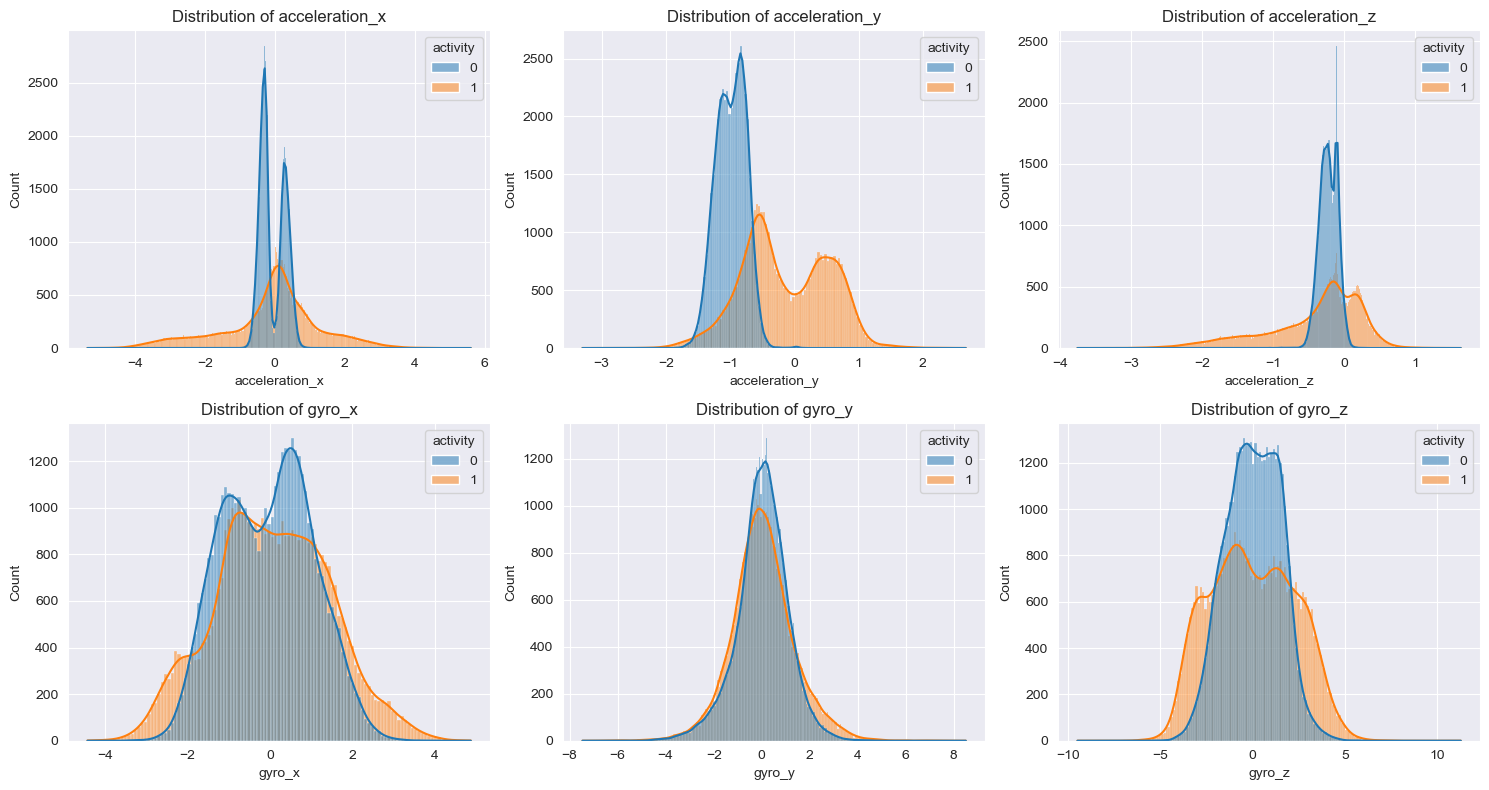

In [25]:
#  Plot Usaging 
numerical_data_Bivariate_visualization(Data, Numerical_Attributes)

- Acceleration X and Y show better separability between walking and running compared to Z.
- Gyroscope features (particularly X and Y) show differences in variability that may help distinguish between walking and running.
- Walking tends to be more steady and consistent across all features, reflecting smoother movements.
- Running is more dynamic and variable, with broader distributions in both acceleration and gyroscope readings.
- Features like acceleration_x, acceleration_y, gyro_x, and gyro_y may be most informative for distinguishing walking from running.

In [26]:
# checking Skewness of the Numerical data distribution
for col in Numerical_Attributes:
    print(f'Skewness of {col} : {Walking_data[col].skew()}')
    print(f'Skewness of {col} : {Running_data[col].skew()}\n\n {'**'*15}')

    

Skewness of acceleration_x : 0.28229198654770743
Skewness of acceleration_x : -0.45085962565680265

 ******************************
Skewness of acceleration_y : -0.11028871914810072
Skewness of acceleration_y : 0.0294149441153883

 ******************************
Skewness of acceleration_z : -0.2781530663948148
Skewness of acceleration_z : -1.0411556749665614

 ******************************
Skewness of gyro_x : 0.04154341138141821
Skewness of gyro_x : 0.0366718071332094

 ******************************
Skewness of gyro_y : -0.35416841438607705
Skewness of gyro_y : 0.14851059126900537

 ******************************
Skewness of gyro_z : -0.060373333253023784
Skewness of gyro_z : 0.07762027824701834

 ******************************


**The ideal skewness is in the range between -0.5 and 0.5**.
- **Here the plot and skewness values clearly show that acceleration_x, acceleration_y and acceleration_z has a bit skewness**

In [27]:
def plot_Bivariate_countplots(data, categorical_columns, cols=1, xtick_rotation=0, ylabel="Count"):
    """
    Plots count plots for categorical columns in the dataset with annotations, xticks, x-axis labels, and y-axis labels.

    Parameters:
    - data: DataFrame containing the data
    - categorical_columns: List of categorical column names to plot
    - cols: Number of columns in the subplot grid (default is 3)
    - xtick_rotation: Rotation angle for xticks (default is 0)
    - ylabel: Label for the y-axis (default is 'Count')

    Returns:
    - cat_fig: The Matplotlib figure object
    - cat_axes: Array of Matplotlib Axes objects
    """
    hue_labels = data['activity'].map({0: "0 - walking", 1: "1 - running"}).fillna(data['activity'])

    rows = len(categorical_columns) // cols + (1 if len(categorical_columns) % cols != 0 else 0)
    cat_fig, cat_axes = plt.subplots(rows, cols, figsize=(cols * 25, rows * 8))  
    cat_axes = cat_axes.flatten()  
    
    for i, col in enumerate(categorical_columns):
        
        sns.countplot(data=data, x=col, ax=cat_axes[i], hue=hue_labels)
        cat_axes[i].set_title(f"Distribution of {col}", fontsize=25)
        
        # Annotate bar counts
        for p in cat_axes[i].patches:  
            count = int(p.get_height())  
            if count > 0:  
                cat_axes[i].annotate(
                    f'{count}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # X and Y position
                    ha='center', 
                    va='bottom', 
                    fontsize=10, 
                    color='black'
                )
        
        
        cat_axes[i].set_xlabel(col, fontsize=20)
        cat_axes[i].set_ylabel(ylabel, fontsize=20)
        cat_axes[i].tick_params(axis='x', rotation=xtick_rotation)  # Rotate xticks
    
    
    for j in range(i + 1, len(cat_axes)):
        cat_axes[j].set_visible(False)
    
    plt.tight_layout()
    return cat_fig, cat_axes

In [28]:
# plotting categorical using  pipeline 
def categorical_data_Bivariate_visualization(data, categorical_columns):
    """
    Executes a data visualization pipeline for numerical columns.

    Parameters:
    - data: DataFrame containing the dataset
    - numerical_columns: List of numerical column names
    """
    fig, axes = plot_Bivariate_countplots(data, categorical_columns)
    plt.show()  # Display plots

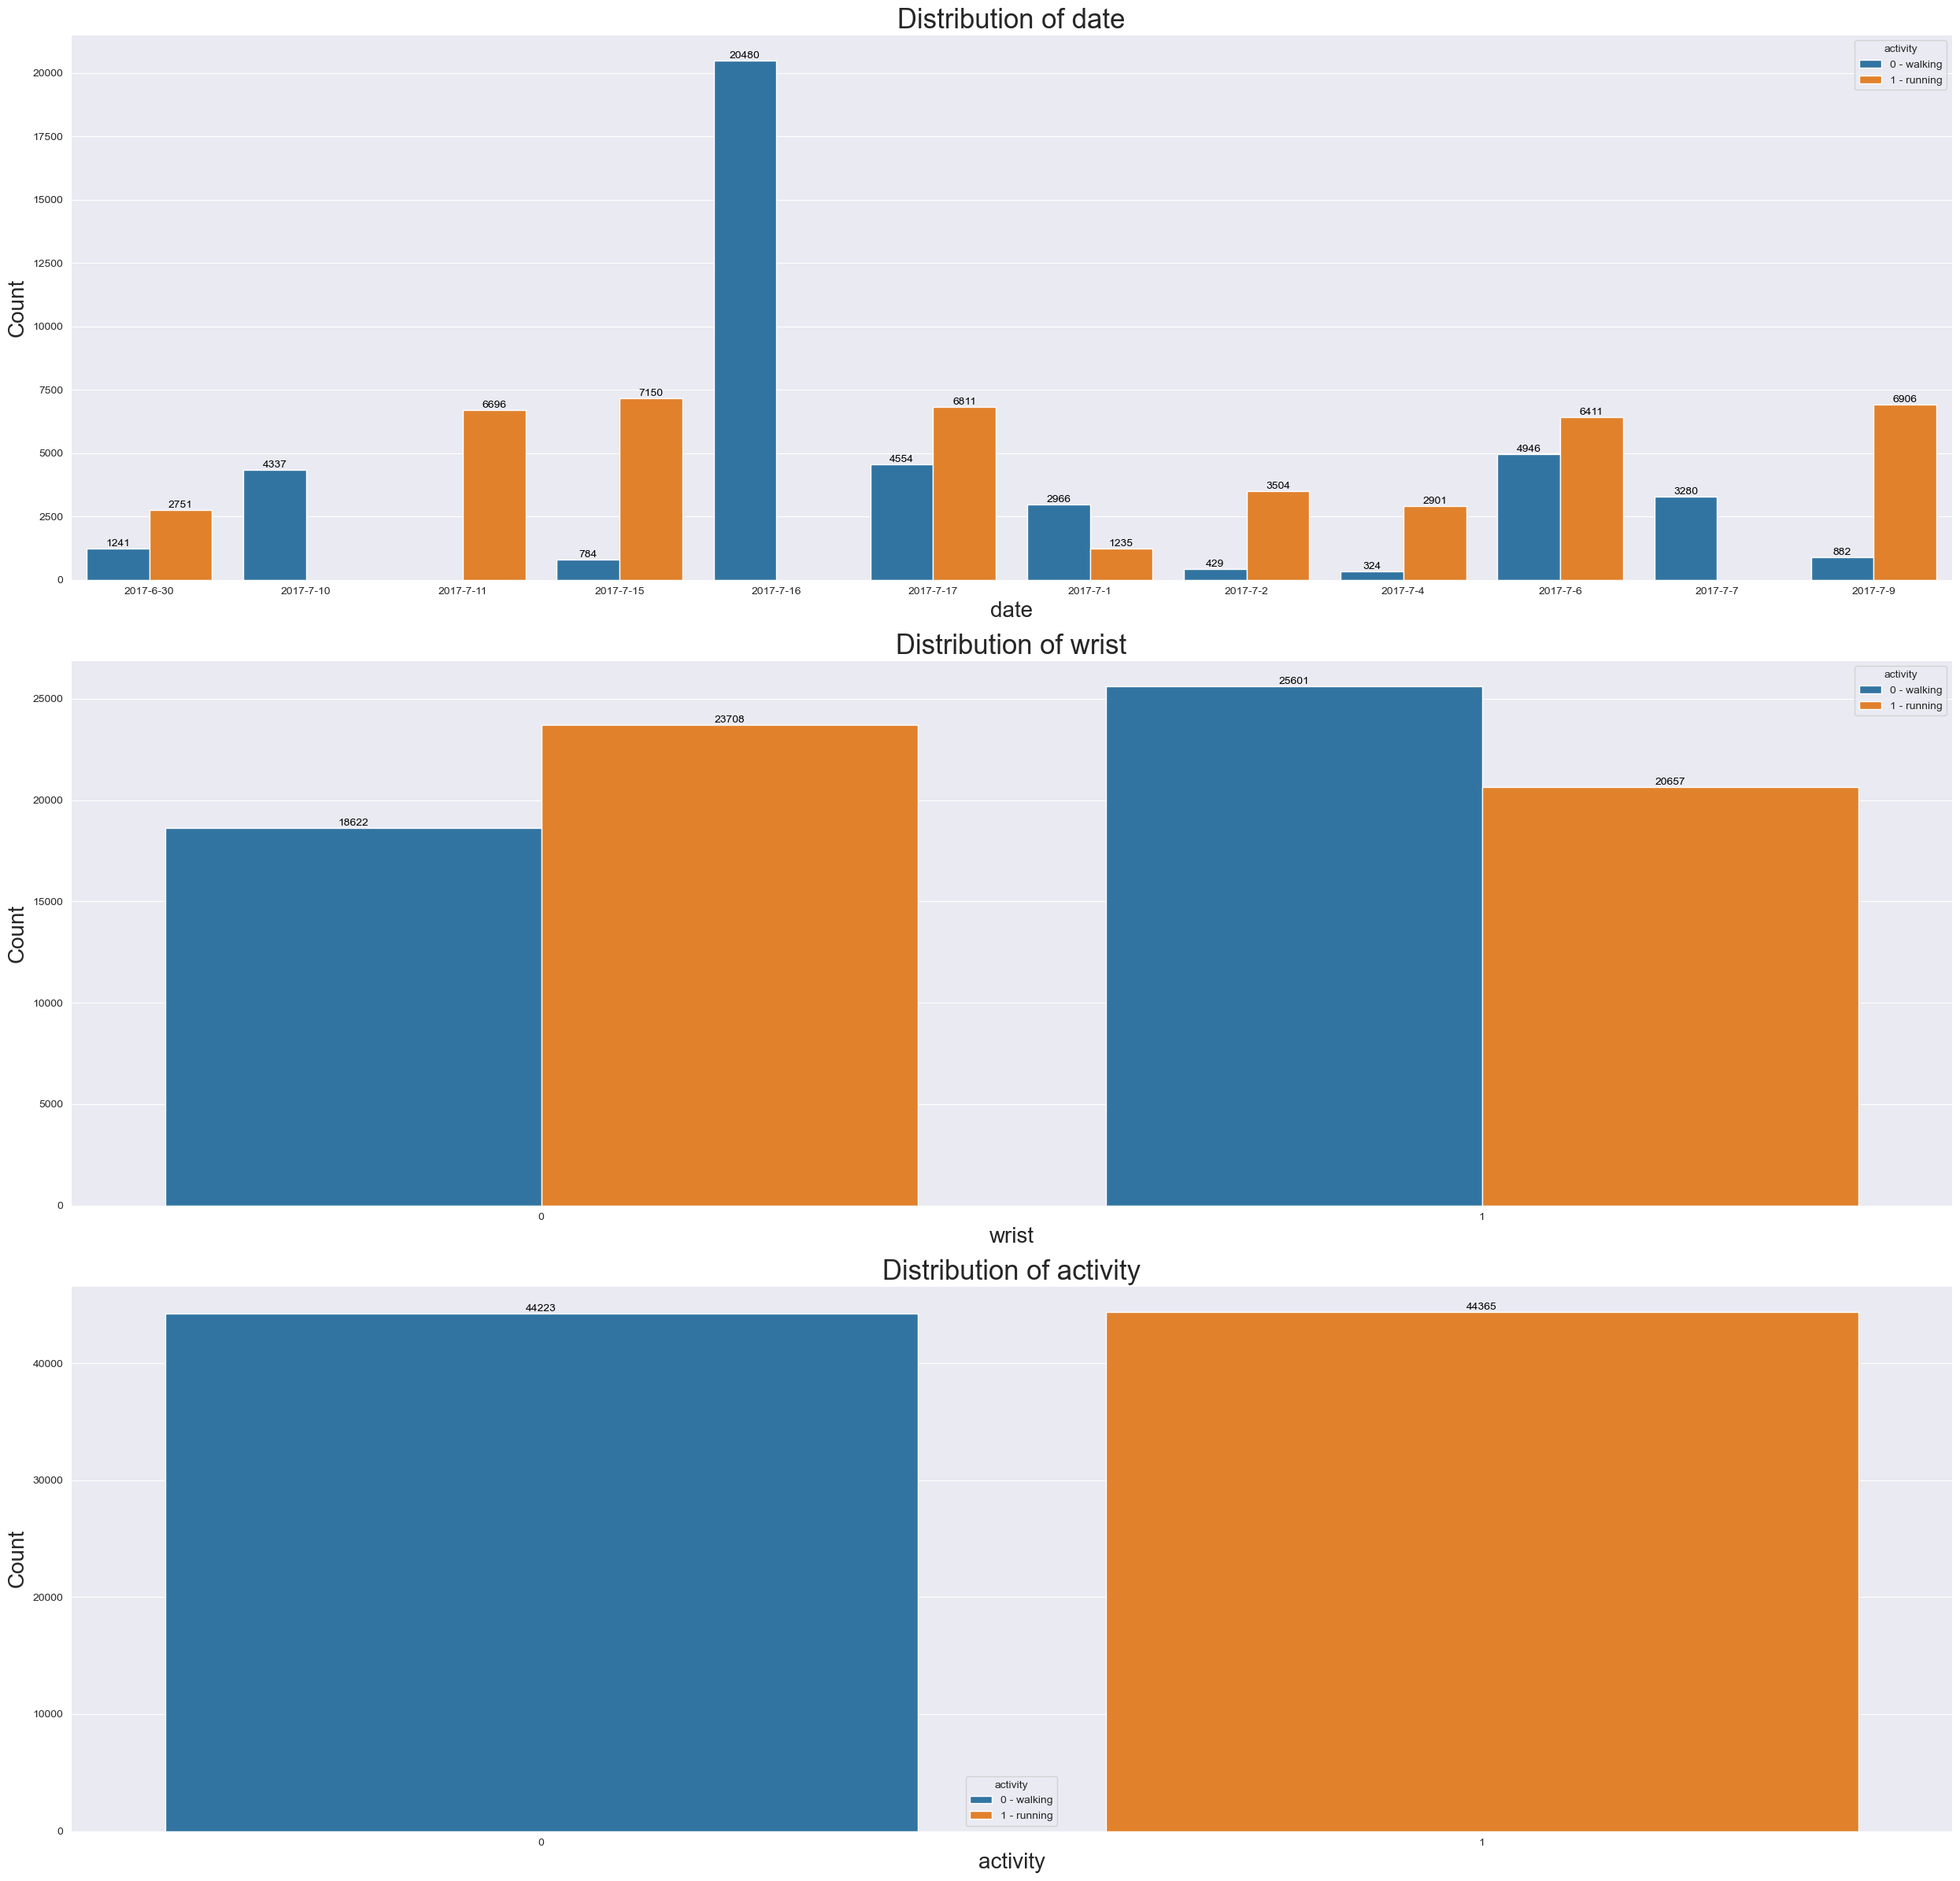

In [29]:
categorical_data_Bivariate_visualization(Data, Categorical_Attributes)

- On July 7 2017, July 10 2017, July 16 2017 the individual engaged exclusively in walking, with an extended duration on July 16, 2017.
- On July 11 2017 the individual participated solely in running for an extended period.
- On all other dates, both walking and running were performed in varying proportions.
- More running samples when wrist = 0(left), but more walking samples when wrist = 1(right)
- Walking activity has a higher count for wrist position 1(right) compared to wrist position 0(left).
- Running activity has a higher count for wrist position 0(left) than wrist position 1(right).

In [30]:
def plot_outlier_boxplot1(data, numerical_columns, cols=3):
    """
    Plots boxplots for numerical columns in the dataset to identify outliers.
    
    Parameters:
    - data: DataFrame containing the data
    - numerical_columns: List of numerical column names to plot
    - cols: Number of columns in the subplot grid (default is 3)
    
    Returns:
    - None (Displays the plots)
    """
    rows = len(numerical_columns) // cols + (1 if len(numerical_columns) % cols != 0 else 0)
    num_fig, num_axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  
    num_axes = num_axes.flatten()  
    
    # Create a copy of activity labels for hue without modifying the original dataset
    activity_labels = data['activity'].replace({0: "0 - walking", 1: "1 - running"})

    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=data, x=activity_labels, y=col, ax=num_axes[i], hue=activity_labels)  
        num_axes[i].set_title(f"Outliers in {col}")
        num_axes[i].set_xlabel("")  
    
    # Hide unused subplots
    for j in range(i + 1, len(num_axes)):
        num_axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


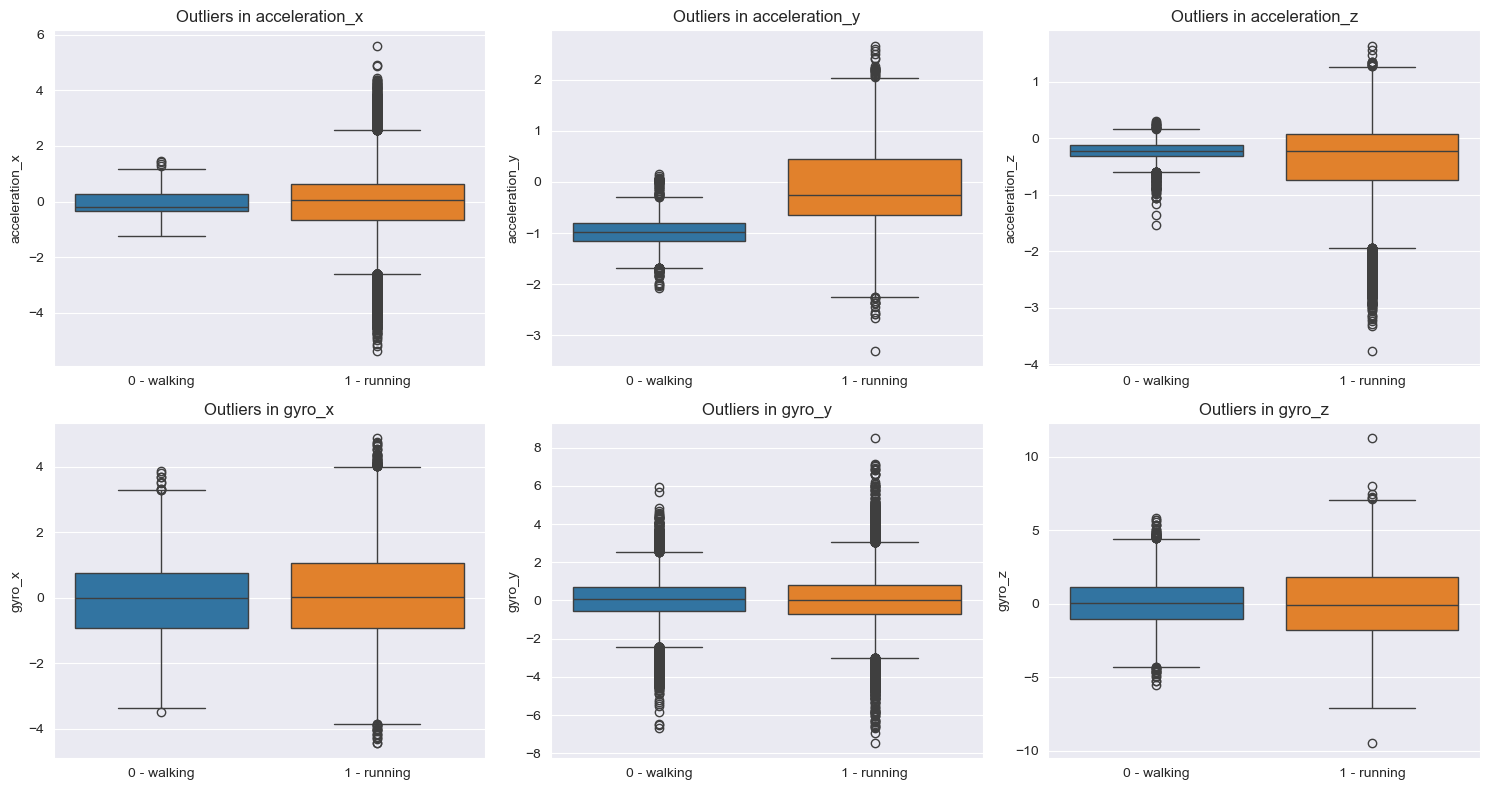

In [31]:
plot_outlier_boxplot1(Data, Numerical_Attributes, cols=3)

- Running tends to have more variability and extreme values in both acceleration and gyroscope data, indicating higher movement intensity and fluctuations compared to walking.

In [32]:
data_date_reformat = Data["date"].str.split("-", expand=True) #reformating date time column


data_time_reformat = Data["time"].str.split(":", expand=True)

#to join we used concat function 
data_date_time_reformat = pd.concat([data_date_reformat, data_time_reformat], axis=1)
data_date_time_reformat.columns = ["year","month", "day", "hour", "minute", "second", "ns"] #rename columns

In [33]:
data_date_time_obj = pd.to_datetime(data_date_time_reformat)#creating an object

In [ ]:
#add datetime object to a new dataframe and set it as index
data_sorted = Data.copy()
data_sorted["datetime"] = data_date_time_obj
data_sorted.set_index("datetime", inplace=True)
data_sorted

In [36]:
print("Start time of data recording ->", data_sorted.index.min())
print("End time of data recording ->", data_sorted.index.max())
print("Number of days of data collection ->", data_sorted.index.day.nunique())
print("Days of data collection ->", data_sorted.date.unique())

Start time of data recording -> 2017-06-30 13:51:15.847724020
End time of data recording -> 2017-07-17 20:16:03.684989988
Number of days of data collection -> 12
Days of data collection -> ['2017-6-30' '2017-7-10' '2017-7-11' '2017-7-15' '2017-7-16' '2017-7-17'
 '2017-7-1' '2017-7-2' '2017-7-4' '2017-7-6' '2017-7-7' '2017-7-9']


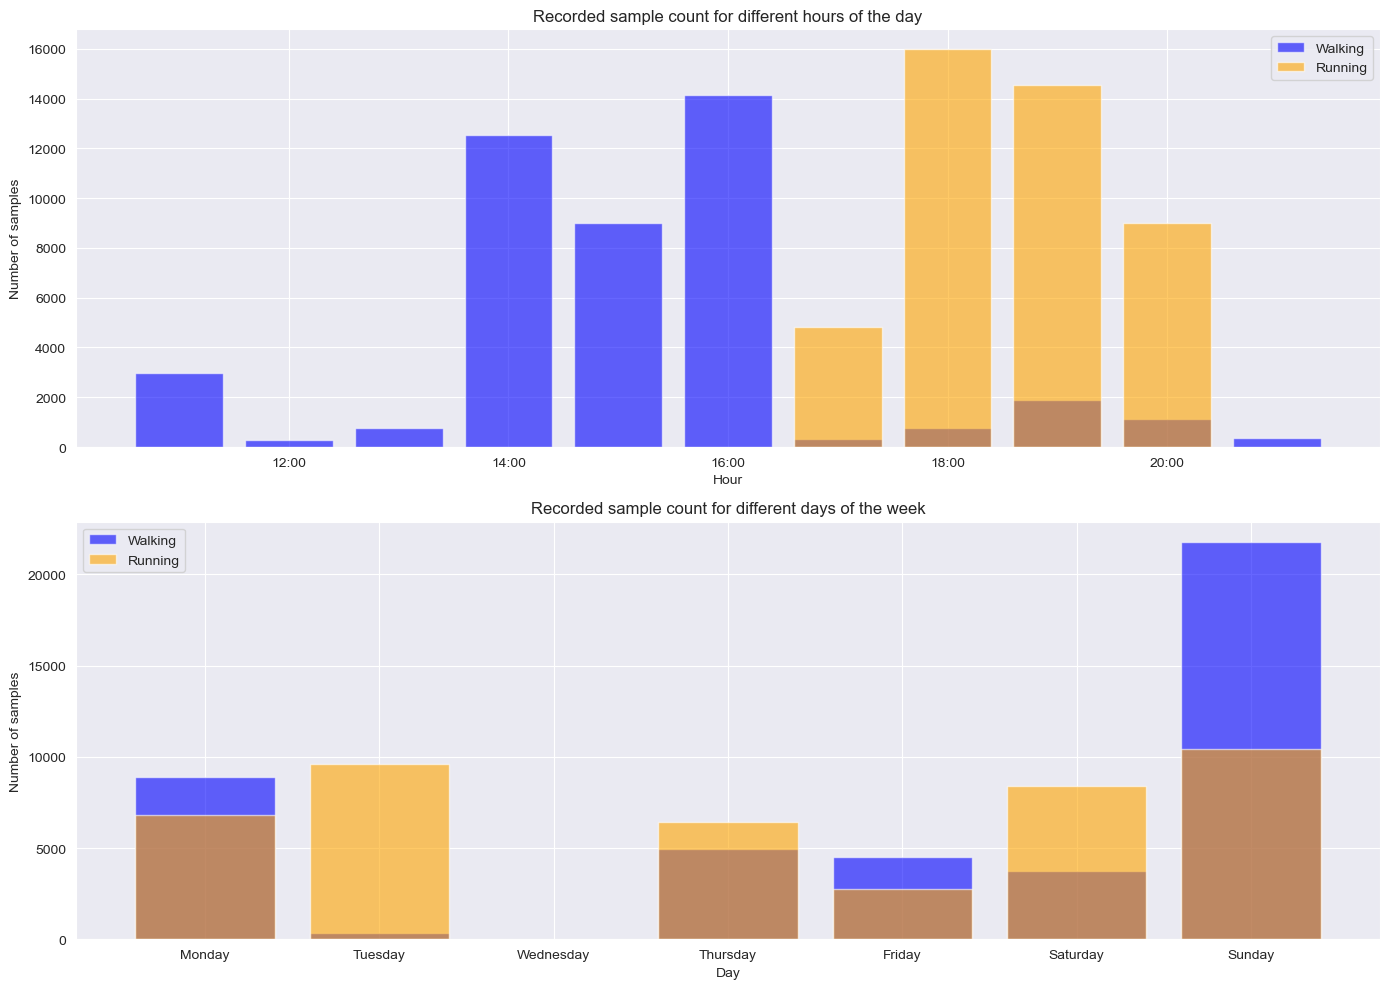

In [37]:
walk_data = data_sorted[data_sorted['activity'] == 0]
run_data = data_sorted[data_sorted['activity'] == 1]

#visualization of user activity pattern
f, ax = plt.subplots(ncols=1, nrows=2, figsize=(14, 10))

# Sample count vs. hour of the day
arr_hr_walk = np.unique(walk_data.index.hour, return_counts=True)
arr_hr_run = np.unique(run_data.index.hour, return_counts=True)

ax[0].bar(arr_hr_walk[0], arr_hr_walk[1], alpha=0.6, label="Walking", color="blue")
ax[0].bar(arr_hr_run[0], arr_hr_run[1], alpha=0.6, label="Running", color="orange")

ax[0].set_title("Recorded sample count for different hours of the day")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Number of samples")
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%d:00'))
ax[0].legend()

# Sample count vs. day of the week
arr_day_walk = np.unique(walk_data.index.dayofweek, return_counts=True)
arr_day_run = np.unique(run_data.index.dayofweek, return_counts=True)

ax[1].bar(arr_day_walk[0], arr_day_walk[1], alpha=0.6, label="Walking", color="blue")
ax[1].bar(arr_day_run[0], arr_day_run[1], alpha=0.6, label="Running", color="orange")

ax[1].set_title("Recorded sample count for different days of the week")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of samples")
ax[1].set_xticks(range(7))
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[1].legend()

f.tight_layout()
plt.show()

- **Mid-day/Early Afternoon Dip:** The very low activity around 12:00-13:00 likely corresponds to lunchtime or the hottest part of the day when people are less inclined to exercise outdoors.
- **Afternoon Increase:** The rise in activity at 14:00-15:00 could be due to:
    1) People taking a walk after lunch.
    2) Athletes beginning afternoon training sessions.
    3) Individuals with flexible work schedules fitting in exercise.
- **Late Afternoon/Early Evening Peak:** The peak activity from 16:00-20:00 is most likely due to:
    1) People finishing work and going for a run or walk.
    2) Team practices for sports.
    3) Individuals prioritizing exercise before dinner.
- **Evening Decline:** The sharp drop-off after 20:00 likely reflects:
    1) People having dinner.
    2) Darkness limiting outdoor activity (depending on the season).
    3) General winding down for the day.
- Sunday has the highest number of recorded samples, exceeding 30,000 , the peak day driven by a significant surge in walking activity.
- Monday follows with a relatively high count, around 15,000 , starts the week with moderate levels of both walking and running.
- Tuesday, Thursday have moderate sample counts, ranging between 10,000 and 15,000. The mid-week dip is evident, suggesting potential fatigue or busier schedules.
- Saturday has high activity across both walking and running, with a more balanced distribution
- Friday has the lowest recorded sample count, falling below 10,000.Activity increases further, especially running, as people anticipate the weekend
- Wednesday seems to have missing data, as it is not represented in the chart.

## Data Preprocessing

### Handling with the Null values

In [38]:
Data.isnull().sum()

date              0
time              0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

***Based on the above observation, all features are free of null values, so handling missing data is unnecessary.***

### Handling with Outliers

**The method which is used to deal the outliers is**

***Winsorization***
- Winsorization is a statistical technique used to limit the effect of extreme values (outliers) in a dataset by capping them at a specified percentile. Instead of removing the outliers, Winsorization replaces them with the nearest value within the given threshold. This technique ensures that the dataset remains intact while minimizing the influence of outliers on statistical analyses

In [39]:
from scipy.stats.mstats import winsorize
winsorize_data = Data.copy()
for column in Numerical_Attributes:
    winsorize_data[column] = winsorize(winsorize_data[column], limits=[0.05, 0.05])

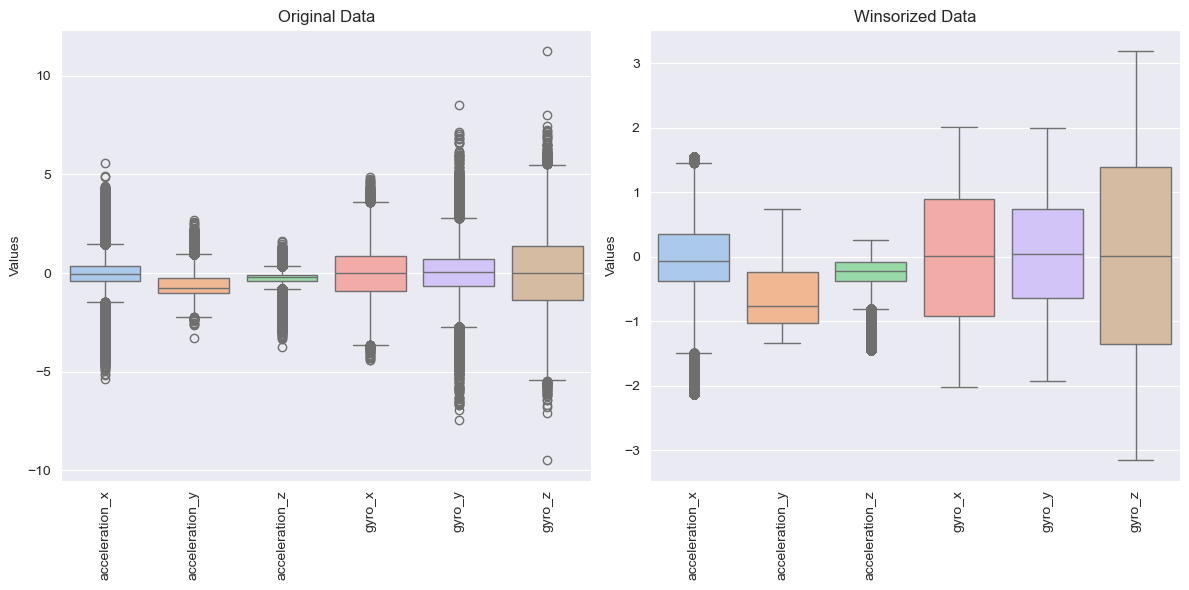

In [40]:
##Comparing the both Box plot for the Original data Winsorized Data
plt.figure(figsize=(12, 6))

# Boxplot for Original Data
plt.subplot(1, 2, 1)
sns.boxplot(data=Data[Numerical_Attributes], palette="pastel")
plt.title("Original Data")
plt.ylabel("Values")
plt.xticks(rotation=90)

# Boxplot for Winsorized Data
plt.subplot(1, 2, 2)
sns.boxplot(data=winsorize_data[Numerical_Attributes], palette="pastel")
plt.title("Winsorized Data")
plt.ylabel("Values")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Based on the above observation, using the Winsorization method to handle outliers is not recommended, as it replaces actual data points with threshold values. 
- This alteration can potentially lead to incorrect model predictions.

***Upon observing the boxplot of the original data, it is evident that there are very few outliers in each feature. As these outliers are minimal, they are unlikely to significantly impact the model's performance, making it unnecessary to handle them***

### Converting date column data type

In [41]:
##Checking the datatype of the data feature
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   wrist           88588 non-null  int64  
 3   activity        88588 non-null  int64  
 4   acceleration_x  88588 non-null  float64
 5   acceleration_y  88588 non-null  float64
 6   acceleration_z  88588 non-null  float64
 7   gyro_x          88588 non-null  float64
 8   gyro_y          88588 non-null  float64
 9   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 6.8+ MB


In [42]:
##Converting the date feature object datatype to datetime data type
Data["date"] = pd.to_datetime(Data["date"])

In [43]:
##The datatype of date column is converted to datatime data type
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            88588 non-null  datetime64[ns]
 1   time            88588 non-null  object        
 2   wrist           88588 non-null  int64         
 3   activity        88588 non-null  int64         
 4   acceleration_x  88588 non-null  float64       
 5   acceleration_y  88588 non-null  float64       
 6   acceleration_z  88588 non-null  float64       
 7   gyro_x          88588 non-null  float64       
 8   gyro_y          88588 non-null  float64       
 9   gyro_z          88588 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 6.8+ MB


### Converting time column data type

In [44]:
##Converting the time fetature object datatype to datetime data type
Data['time'] = pd.to_datetime(Data['time'], format='%H:%M:%S:%f')

In [45]:
##Converting the time fetature datatime datatype to float data type
Data['time'] = Data['time'].dt.hour + Data['time'].dt.minute / 60 + Data['time'].dt.second / 3600

In [46]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            88588 non-null  datetime64[ns]
 1   time            88588 non-null  float64       
 2   wrist           88588 non-null  int64         
 3   activity        88588 non-null  int64         
 4   acceleration_x  88588 non-null  float64       
 5   acceleration_y  88588 non-null  float64       
 6   acceleration_z  88588 non-null  float64       
 7   gyro_x          88588 non-null  float64       
 8   gyro_y          88588 non-null  float64       
 9   gyro_z          88588 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 6.8 MB


## Feture Engineering

### Feture extraction

- Feature extraction is the process of transforming raw data into meaningful and informative features that can be used effectively by machine learning algorithms. 
- It aims to generating new features while preserving its essential information, improving both the performance and interpretability of the model.

In [48]:
##Extracting thhe new features from the date column
Data["year"] = Data["date"].dt.year
Data["month"] = Data["date"].dt.month
Data["day"] = Data["date"].dt.day

In [49]:
Data.head()

,date,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,year,month,day
0,2017-06-30,13.854167,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017,6,30
1,2017-06-30,13.854444,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017,6,30
2,2017-06-30,13.854444,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017,6,30
3,2017-06-30,13.854444,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017,6,30
4,2017-06-30,13.854444,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017,6,30


In [50]:
Data.year.nunique()

1

In [51]:
##Dropping the date column and year column from the data
Data.drop(["date","year"],axis=1,inplace=True)

In [52]:
Data.head()

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30


### Feture Selection

- Feature selection is a crucial process in machine learning that involves selecting a subset of relevant features (variables) from a larger set of features to improve model performance.
- By choosing the most important features, it helps in reducing overfitting, improving accuracy, and decreasing computational cost.

**Correlation Coefficient:**
- The correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables.
- It quantifies how much two variables are related to each other.
- We are using the correlation coefficient for the feature selection.

In [53]:
Data.drop("activity",axis=1).corr()

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
time,1.000000,-0.270552,0.097622,0.490211,-0.183482,0.036793,0.024671,-0.008938,-0.201413,-0.082909
wrist,-0.270552,1.000000,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796,0.227086,0.437214
acceleration_x,0.097622,-0.609579,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849,-0.174439,-0.245871
acceleration_y,0.490211,0.087091,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994,-0.026161,0.011228
acceleration_z,-0.183482,0.323680,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621,0.048062,0.243741
gyro_x,0.036793,-0.022092,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769,-0.012304,-0.009496
gyro_y,0.024671,-0.068403,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244,-0.017153,-0.032936
gyro_z,-0.008938,0.008796,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000,0.003322,0.005699
month,-0.201413,0.227086,-0.174439,-0.026161,0.048062,-0.012304,-0.017153,0.003322,1.000000,-0.607614
day,-0.082909,0.437214,-0.245871,0.011228,0.243741,-0.009496,-0.032936,0.005699,-0.607614,1.000000


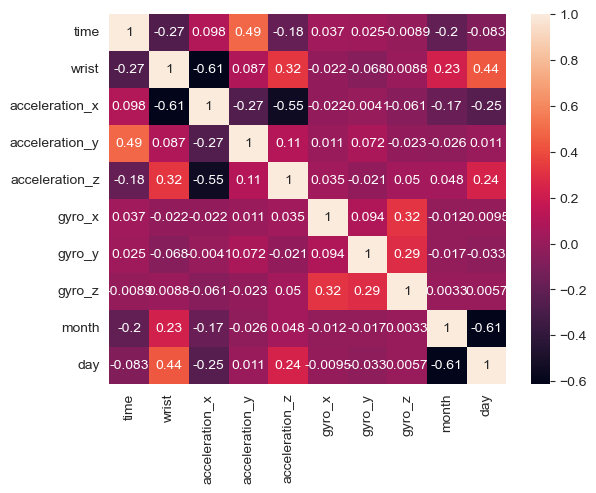

In [54]:
sns.heatmap(Data.drop('activity',axis=1).corr(),annot=True)
plt.show()

- Features such as "wrist," "day," and "acceleration_x" appear to be more important due to their stronger correlations with other features.
- But in this case we need to consider the all the features for model prediction

## Encoding

In [55]:
Data.head()

,time,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30


***As all the columns/features are numerical, so that there is no need performing the encoding***

## Scaling

***Since the feature values fall within a small range (0-50), scaling will not significantly impact the model's performance, so it is not necessary.***

In [56]:
##Splitting the data into x(Predictors) and y(Target variable)
x = Data.drop("activity",axis=1)
y = Data.activity

In [57]:
x

,time,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,month,day
0,13.854167,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,6,30
1,13.854444,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,6,30
2,13.854444,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,6,30
3,13.854444,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,6,30
4,13.854444,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,6,30
...,...,...,...,...,...,...,...,...,...,...
88583,20.154167,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,7,9
88584,20.154167,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,7,9
88585,20.154167,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,7,9
88586,20.154167,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,7,9


## Balancing

In [58]:
y.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

***Balancing is not required since the dataset is already evenly distributed, with 1 comprising 50.08% and 0 comprising 49.91%***

In [59]:
##Train Test splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Model Creation by Logistic Regression

In [60]:
##Logistic regression model creation
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

## Model Evaluation for Logistic Regression

In [61]:
##Predicting the testing data
Lr_y_pred_test=Lr.predict(x_test)

In [62]:
##Predicting the training data
Lr_y_pred_train=Lr.predict(x_train)

In [63]:
# Logistic Regression Testing Evalution metrices 
Lr_test_accuracy =round(accuracy_score(y_test, Lr_y_pred_test), 3)
Lr_test_recall = round(recall_score(y_test, Lr_y_pred_test),3)
Lr_test_precision = round(precision_score(y_test, Lr_y_pred_test),3)
Lr_test_f1_score = round( f1_score(y_test, Lr_y_pred_test),3)

print(f'Logistic Regression Testing Evalution metrices : \n{'*'*70}')
print(f"Accuracy for test data: {Lr_test_accuracy},\nRecall-Score for test data: {Lr_test_recall},\nPrecision-Score for test data: {Lr_test_precision},\nF1-Score for test data: {Lr_test_f1_score}")

# Logistic Regression Training Evalution metrices
Lr_training_accuracy = round(accuracy_score(y_train, Lr_y_pred_train),3)
Lr_training_recall = round(recall_score(y_train, Lr_y_pred_train),3)
Lr_training_precision = round(precision_score(y_train, Lr_y_pred_train),3)
Lr_training_f1_score = round(f1_score(y_train, Lr_y_pred_train),3)

print(f'\n Logistic Regression Training Evalution metrices : \n{'*'*70}')
print(f"Accuracy for Training data: {Lr_training_accuracy},\nRecall-Score for Training data: {Lr_training_recall},\nPrecision-Score for Training data: {Lr_training_precision},\nF1-Score for Training data: {Lr_training_f1_score}")

Logistic Regression Testing Evalution metrices : 
**********************************************************************
Accuracy for test data: 0.951,
Recall-Score for test data: 0.967,
Precision-Score for test data: 0.936,
F1-Score for test data: 0.951

 Logistic Regression Training Evalution metrices : 
**********************************************************************
Accuracy for Training data: 0.951,
Recall-Score for Training data: 0.965,
Precision-Score for Training data: 0.939,
F1-Score for Training data: 0.952


In [64]:
# Metrics for both results
LR_testing_metrics = {"Accuracy": Lr_test_accuracy, "Recall-Score": Lr_test_recall, "Precision-Score": Lr_test_precision ,"F1-Score": Lr_test_f1_score}
LR_training_metrics = {"Accuracy": Lr_training_accuracy, "Recall-Score": Lr_training_recall, "Precision-Score": Lr_training_precision ,"F1-Score": Lr_training_f1_score} 

# Print side by side
print(f"{'Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in LR_testing_metrics:
    print(f"{key:<30}{LR_testing_metrics[key]:<30}{LR_training_metrics[key]:<20}")

Evalution Metric              Test Data                     Train Data                    
Accuracy                      0.951                         0.951               
Recall-Score                  0.967                         0.965               
Precision-Score               0.936                         0.939               
F1-Score                      0.951                         0.952               


In [65]:
print(f"Classification report for testing data:\n{classification_report(y_test,Lr_y_pred_test)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,Lr_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8913
           1       0.94      0.97      0.95      8805

    accuracy                           0.95     17718
   macro avg       0.95      0.95      0.95     17718
weighted avg       0.95      0.95      0.95     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     35310
           1       0.94      0.97      0.95     35560

    accuracy                           0.95     70870
   macro avg       0.95      0.95      0.95     70870
weighted avg       0.95      0.95      0.95     70870



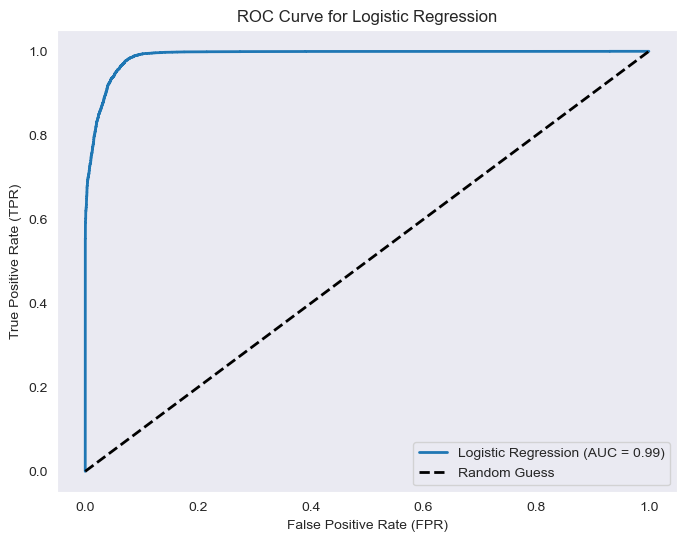

In [66]:
y_probs_Lr = Lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_Lr)
auc_score = roc_auc_score(y_test, y_probs_Lr)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Hyperparameter Tuning for Logistic Regression

In [67]:
param_distributions = {
    'penalty': ["l1","l2","elasticnet"],
    'solver': ["netwon-cg","lgfgs","sag","saga"],
    'max_iter': [100,200,300,400,500],
    'class_weight': ["balanced"],
    'random_state': [10,20,30,42],
    'verbose': [1,2,3,4,5]
}

LR_grid_search = RandomizedSearchCV(Lr, param_distributions, cv=5, scoring='accuracy')
LR_grid_search.fit(x_train, y_train)

max_iter reached after 6 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 8 seconds


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'class_weight': ['balanced'],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'random_state': [10, 20, 30, 42],
                                        'solver': ['netwon-cg', 'lgfgs', 'sag',
                                                   'saga'],
                                        'verbose': [1, 2, 3, 4, 5]},
                   scoring='accuracy')

In [68]:
print("Best Parameters:", LR_grid_search.best_params_)

Best Parameters: {'verbose': 5, 'solver': 'sag', 'random_state': 20, 'penalty': 'l2', 'max_iter': 300, 'class_weight': 'balanced'}


In [69]:
# best_lrg_model =
LR_grid_search.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=300, random_state=20,
                   solver='sag', verbose=5)

In [70]:
Lr_best_model=LogisticRegression(class_weight= "balanced", max_iter= 400, random_state= 20, solver= "saga", verbose= 1)

In [71]:
Lr_best_model.fit(x_train,y_train)

max_iter reached after 10 seconds


LogisticRegression(class_weight='balanced', max_iter=400, random_state=20,
                   solver='saga', verbose=1)

In [72]:
# Predict on the test set
Lr_pred_hyp_test = Lr_best_model.predict(x_test)
# Predict on the train set
Lr_pred_hyp_train = Lr_best_model.predict(x_train)

# Evaluate the model for test set
Lr_test_accuracy_hyp = round( accuracy_score(y_test, Lr_pred_hyp_test),3)
Lr_test_recall_hyp = round( recall_score(y_test, Lr_pred_hyp_test),3)
Lr_test_precision_hyp = round( precision_score(y_test, Lr_pred_hyp_test),3)
Lr_test_f1_score_hyp = round( f1_score(y_test, Lr_pred_hyp_test),3)

print(f'Logistic Regression Testing Evalution metrices : \n{'*'*70}')
print(f"Accuracy for test data: {Lr_test_accuracy_hyp } ,\nRecall-Score for test data: {Lr_test_recall_hyp},\nPrecision-Score for test data: {Lr_test_precision_hyp},\nF1-Score for test data: {Lr_test_f1_score_hyp}")

# Evaluate the model for train set
Lr_train_accuracy_hyp = round( accuracy_score(y_train, Lr_pred_hyp_train),3)
Lr_train_recall_hyp = round( recall_score(y_train, Lr_pred_hyp_train),3)
Lr_train_precision_hyp = round( precision_score(y_train, Lr_pred_hyp_train),3)
Lr_train_f1_score_hyp = round( f1_score(y_train, Lr_pred_hyp_train),3)

print(f'\n Logistic Regression Training Evalution metrices : \n{'*'*70}')
print(f"Accuracy for train data: {Lr_train_accuracy_hyp } ,\nRecall-Score for train data: {Lr_train_recall_hyp},\nPrecision-Score for train data: {Lr_train_precision_hyp},\nF1-Score for train data: {Lr_train_f1_score_hyp}")


Logistic Regression Testing Evalution metrices : 
**********************************************************************
Accuracy for test data: 0.951 ,
Recall-Score for test data: 0.966,
Precision-Score for test data: 0.937,
F1-Score for test data: 0.952

 Logistic Regression Training Evalution metrices : 
**********************************************************************
Accuracy for train data: 0.951 ,
Recall-Score for train data: 0.965,
Precision-Score for train data: 0.939,
F1-Score for train data: 0.952


In [73]:
# Metrics for both results
LR_Hyp_testing_metrics = {"Accuracy": Lr_test_accuracy_hyp, "Recall-Score": Lr_test_recall_hyp, "Precision-Score": Lr_test_precision_hyp ,"F1-Score": Lr_test_f1_score_hyp}
LR_Hyp_training_metrics = {"Accuracy": Lr_train_accuracy_hyp, "Recall-Score": Lr_train_recall_hyp, "Precision-Score": Lr_train_precision_hyp ,"F1-Score": Lr_train_f1_score_hyp} 

# Print side by side
print(f"{'Hyp Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in LR_Hyp_testing_metrics:
    print(f"{key:<30}{LR_Hyp_testing_metrics[key]:<30}{LR_Hyp_training_metrics[key]:<20}")

Hyp Evalution Metric          Test Data                     Train Data                    
Accuracy                      0.951                         0.951               
Recall-Score                  0.966                         0.965               
Precision-Score               0.937                         0.939               
F1-Score                      0.952                         0.952               


In [74]:
# Classification report
print(f"Classification report for testing data after hyperparameter tuning:\n{classification_report(y_test,Lr_pred_hyp_test)}")
print(f"Classification report for training data after hyperparameter tuning:\n{classification_report(y_train,Lr_pred_hyp_train)}")

Classification report for testing data after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8913
           1       0.94      0.97      0.95      8805

    accuracy                           0.95     17718
   macro avg       0.95      0.95      0.95     17718
weighted avg       0.95      0.95      0.95     17718

Classification report for training data after hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     35310
           1       0.94      0.96      0.95     35560

    accuracy                           0.95     70870
   macro avg       0.95      0.95      0.95     70870
weighted avg       0.95      0.95      0.95     70870



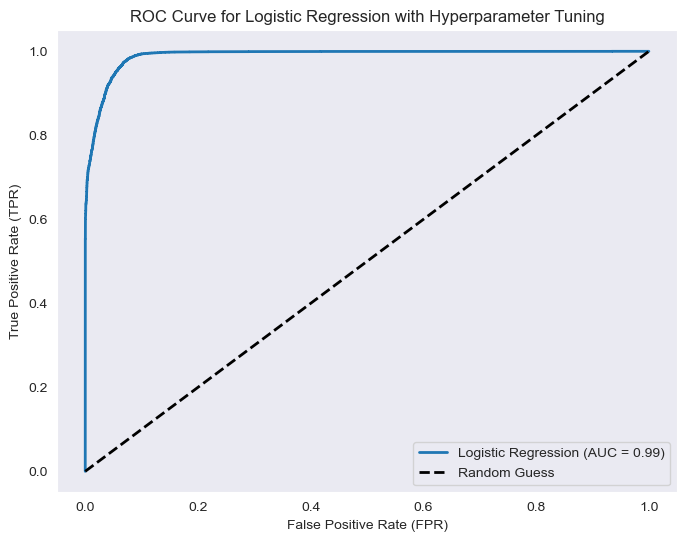

In [75]:
y_probs_Lr_hyp = Lr_best_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_Lr_hyp)
auc_score = roc_auc_score(y_test, y_probs_Lr_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## KNN

In [76]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate = round(((y_test !=y_pred).sum()/len(y_test) * 100),3)
    err_rate.append(error_rate)
print(err_rate)

[0.327, 0.446, 0.316, 0.406, 0.373, 0.446, 0.418, 0.485, 0.44, 0.463]


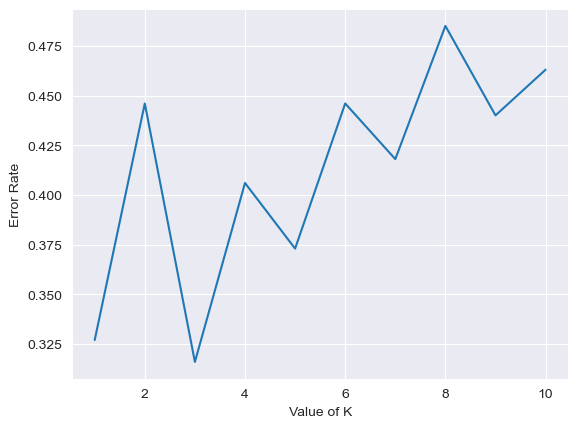

In [77]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)
plt.xlabel("Value of K")
plt.ylabel("Error Rate")
plt.show()

**Even k=3 gives minimum error rate(WCSS) but it often lead to high variance, meaning the model is overly sensitive to noise in the data, So k=5 provides a good balance, minimizing both bias and variance.**

In [78]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
# Predict on the test set
knn_y_pred = knn.predict(x_test)
# Predict on the train set
knn_y_pred_train = knn.predict(x_train)

# Evaluate the model for test set
knn_test_accuracy = round( accuracy_score(y_test, knn_y_pred),3)
knn_test_recall = round( recall_score(y_test, knn_y_pred),3)
knn_test_precision = round( precision_score(y_test, knn_y_pred),3)
knn_test_f1_score = round( f1_score(y_test, knn_y_pred),3)

print(f'K-Nearest Neighbor Testing Evalution metrices : \n{'*'*70}')
print(f"Accuracy for test data: {knn_test_accuracy } ,\nRecall-Score for test data: {knn_test_recall},\nPrecision-Score for test data: {knn_test_precision},\nF1-Score for test data: {knn_test_f1_score}")

# Evaluate the model for train set
knn_train_accuracy = round( accuracy_score(y_train, knn_y_pred_train),3)
knn_train_recall = round( recall_score(y_train, knn_y_pred_train),3)
knn_train_precision = round( precision_score(y_train, knn_y_pred_train),3)
knn_train_f1_score = round( f1_score(y_train, knn_y_pred_train),3)

print(f'\n K-Nearest Neighbor Training Evalution metrices : \n{'*'*70}')
print(f"Accuracy for train data: {knn_train_accuracy } ,\nRecall-Score for train data: {knn_train_recall},\nPrecision-Score for train data: {knn_train_precision},\nF1-Score for train data: {knn_train_f1_score}")


K-Nearest Neighbor Testing Evalution metrices : 
**********************************************************************
Accuracy for test data: 0.996 ,
Recall-Score for test data: 0.994,
Precision-Score for test data: 0.999,
F1-Score for test data: 0.996

 K-Nearest Neighbor Training Evalution metrices : 
**********************************************************************
Accuracy for train data: 0.998 ,
Recall-Score for train data: 0.997,
Precision-Score for train data: 0.999,
F1-Score for train data: 0.998


In [80]:
# Metrics for both results
KNN_testing_metrics = {"Accuracy": knn_test_accuracy, "Recall-Score": knn_test_recall, "Precision-Score": knn_test_precision ,"F1-Score": knn_test_f1_score}
KNN_training_metrics = {"Accuracy": knn_train_accuracy, "Recall-Score": knn_train_recall, "Precision-Score": knn_train_precision ,"F1-Score": knn_train_f1_score} 

# Print side by side
print(f"{'KNN-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in KNN_testing_metrics:
    print(f"{key:<30}{KNN_testing_metrics[key]:<30}{KNN_training_metrics[key]:<20}")

KNN-Evalution Metric          Test Data                     Train Data                    
Accuracy                      0.996                         0.998               
Recall-Score                  0.994                         0.997               
Precision-Score               0.999                         0.999               
F1-Score                      0.996                         0.998               


In [81]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,knn_y_pred)}")
print(f"Classification report for training data:\n{classification_report(y_train,knn_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8913
           1       1.00      0.99      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



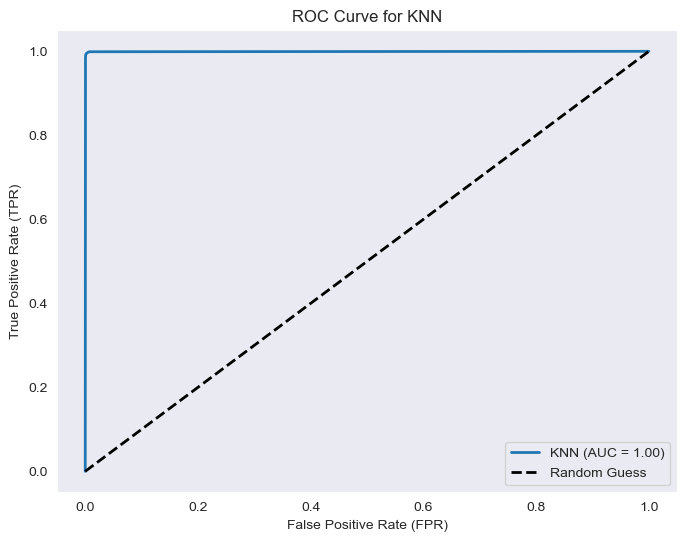

In [82]:
y_probs_knn = knn.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
auc_score = roc_auc_score(y_test, y_probs_knn)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Hyperparameter Tuning for KNN

In [83]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
knn_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [84]:
print("Best Parameters:", knn_grid_search.best_params_)

Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [85]:
# best_knn_model =
knn_grid_search.best_estimator_

KNeighborsClassifier(p=1, weights='distance')

In [86]:
KNN=KNeighborsClassifier(n_neighbors=5,p=1,weights='distance')
KNN.fit(x_train,y_train)

KNeighborsClassifier(p=1, weights='distance')

In [87]:
# Predict on the test set
knn_y_pred_hyp = KNN.predict(x_test)
# Predict on the train set
knn_y_pred_train_hyp = KNN.predict(x_train)

# Evaluate the model for test set
knn_test_accuracy_hyp = round( accuracy_score(y_test, knn_y_pred_hyp),3)
knn_test_recall_hyp = round( recall_score(y_test, knn_y_pred_hyp),3)
knn_test_precision_hyp = round( precision_score(y_test, knn_y_pred_hyp),3)
knn_test_f1_score_hyp = round( f1_score(y_test, knn_y_pred_hyp),3)

print(f'K-Nearest Neighbor Testing Evalution Metrices After Tuning  : \n{'*'*70}')
print(f"Accuracy for test data: {knn_test_accuracy_hyp } ,\nRecall-Score for test data: {knn_test_recall_hyp},\nPrecision-Score for test data: {knn_test_precision_hyp},\nF1-Score for test data: {knn_test_f1_score_hyp}")

# Evaluate the model for train set
knn_train_accuracy_hyp = round( accuracy_score(y_train, knn_y_pred_train_hyp),3)
knn_train_recall_hyp = round( recall_score(y_train, knn_y_pred_train_hyp),3)
knn_train_precision_hyp = round( precision_score(y_train, knn_y_pred_train_hyp),3)
knn_train_f1_score_hyp = round( f1_score(y_train, knn_y_pred_train_hyp),3)

print(f'\n K-Nearest Neighbor Training Evalution Metrices After Tuning : \n{'*'*70}')
print(f"Accuracy for train data: {knn_train_accuracy_hyp } ,\nRecall-Score for train data: {knn_train_recall_hyp},\nPrecision-Score for train data: {knn_train_precision_hyp},\nF1-Score for train data: {knn_train_f1_score_hyp}")


K-Nearest Neighbor Testing Evalution Metrices After Tuning  : 
**********************************************************************
Accuracy for test data: 0.997 ,
Recall-Score for test data: 0.995,
Precision-Score for test data: 0.999,
F1-Score for test data: 0.997

 K-Nearest Neighbor Training Evalution Metrices After Tuning : 
**********************************************************************
Accuracy for train data: 1.0 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 1.0,
F1-Score for train data: 1.0


In [88]:
# Metrics for both results
KNN_Hyp_testing_metrics = {"Accuracy": knn_test_accuracy_hyp, "Recall-Score": knn_test_recall_hyp, "Precision-Score": knn_test_precision_hyp ,"F1-Score": knn_test_f1_score_hyp}
KNN_Hyp_training_metrics = {"Accuracy": knn_train_accuracy_hyp, "Recall-Score": knn_train_recall_hyp, "Precision-Score": knn_train_precision_hyp ,"F1-Score": knn_train_f1_score_hyp} 

# Print side by side
print(f"{'KNN-HYP-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in KNN_Hyp_testing_metrics:
    print(f"{key:<30}{KNN_Hyp_testing_metrics[key]:<30}{KNN_Hyp_training_metrics[key]:<20}")

KNN-HYP-Evalution Metric      Test Data                     Train Data                    
Accuracy                      0.997                         1.0                 
Recall-Score                  0.995                         1.0                 
Precision-Score               0.999                         1.0                 
F1-Score                      0.997                         1.0                 


In [89]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,knn_y_pred_hyp)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,knn_y_pred_train_hyp)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



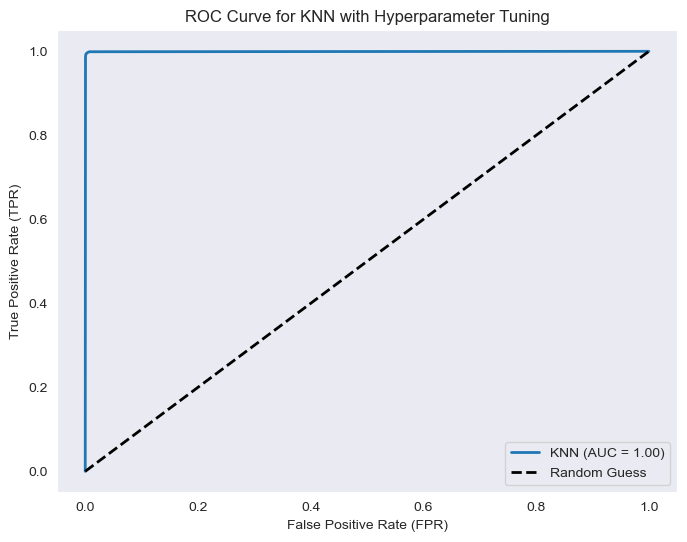

In [90]:
y_probs_knn_hyp = KNN.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
auc_score = roc_auc_score(y_test, y_probs_knn)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Naive Bayes :

In [91]:

NB_classifier = GaussianNB()
NB_classifier.fit(x_train,y_train)

GaussianNB()

In [92]:
# Predict on the test set
NB_y_pred= NB_classifier.predict(x_test)
# Predict on the train set
NB_y_pred_train = NB_classifier.predict(x_train)

# Evaluate the model for test set
NB_test_accuracy = round( accuracy_score(y_test, NB_y_pred),3)
NB_test_recall = round( recall_score(y_test, NB_y_pred),3)
NB_test_precision = round( precision_score(y_test, NB_y_pred),3)
NB_test_f1_score= round( f1_score(y_test, NB_y_pred),3)

print(f' Naive Bayes  Testing : \n{'*'*70}')
print(f"Accuracy for test data: {NB_test_accuracy } ,\nRecall-Score for test data: {NB_test_recall},\nPrecision-Score for test data: {NB_test_precision},\nF1-Score for test data: {NB_test_f1_score}")

# Evaluate the model for train set
NB_train_accuracy = round( accuracy_score(y_train, NB_y_pred_train),3)
NB_train_recall = round( recall_score(y_train, NB_y_pred_train),3)
NB_train_precision = round( precision_score(y_train, NB_y_pred_train),3)
NB_train_f1_score = round( f1_score(y_train, NB_y_pred_train),3)

print(f'\n Naive Bayes Training  : \n{'*'*70}')
print(f"Accuracy for train data: {NB_train_accuracy } ,\nRecall-Score for train data: {NB_train_recall},\nPrecision-Score for train data: {NB_train_precision},\nF1-Score for train data: {NB_train_f1_score}")


 Naive Bayes  Testing : 
**********************************************************************
Accuracy for test data: 0.972 ,
Recall-Score for test data: 0.977,
Precision-Score for test data: 0.967,
F1-Score for test data: 0.972

 Naive Bayes Training  : 
**********************************************************************
Accuracy for train data: 0.971 ,
Recall-Score for train data: 0.977,
Precision-Score for train data: 0.966,
F1-Score for train data: 0.972


In [93]:
# Metrics for both results
NBC_testing_metrics = {"Accuracy": NB_test_accuracy, "Recall-Score": NB_test_recall, "Precision-Score": NB_test_precision ,"F1-Score": NB_test_f1_score}
NBC_training_metrics = {"Accuracy": NB_train_accuracy, "Recall-Score": NB_train_recall, "Precision-Score": NB_train_precision ,"F1-Score": NB_train_f1_score} 

# Print side by side
print(f"{'SVM-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in NBC_testing_metrics:
    print(f"{key:<30}{NBC_testing_metrics[key]:<30}{NBC_training_metrics[key]:<20}")

SVM-Evalution Metric          Test Data                     Train Data                    
Accuracy                      0.972                         0.971               
Recall-Score                  0.977                         0.977               
Precision-Score               0.967                         0.966               
F1-Score                      0.972                         0.972               


In [94]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,NB_y_pred)}\n {'**'*25}")
print(f"Classification report for training data:\n{classification_report(y_train,NB_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8913
           1       0.97      0.98      0.97      8805

    accuracy                           0.97     17718
   macro avg       0.97      0.97      0.97     17718
weighted avg       0.97      0.97      0.97     17718

 **************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     35310
           1       0.97      0.98      0.97     35560

    accuracy                           0.97     70870
   macro avg       0.97      0.97      0.97     70870
weighted avg       0.97      0.97      0.97     70870



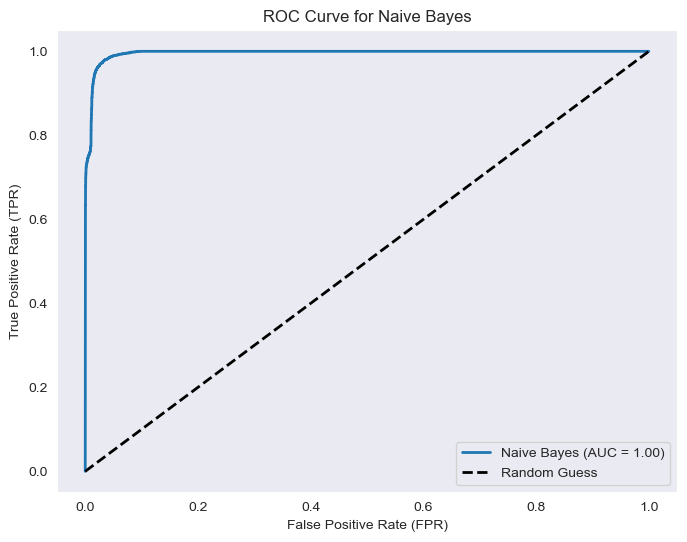

In [95]:
y_probs_dt_hyp = NB_classifier.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt_hyp)
auc_score = roc_auc_score(y_test, y_probs_dt_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Hyperparameter Tuning for Naive Bayes :

In [96]:

param_grid = {
    'priors': [[0.6, 0.4]],  # Array-like format for priors
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}


NB_grid_search = GridSearchCV(NB_classifier, param_grid, cv=5,verbose=2, scoring='accuracy',n_jobs=-1)
NB_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [[0.6, 0.4]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='accuracy', verbose=2)

In [97]:
# Printing Best Parameters 
print("Best Parameters:", NB_grid_search.best_params_)

Best Parameters: {'priors': [0.6, 0.4], 'var_smoothing': 1e-09}


In [98]:
# Best Parameters  
NB_grid_search.best_estimator_

GaussianNB(priors=[0.6, 0.4])

In [99]:
NB_HYP= GaussianNB(priors=[0.6, 0.4])

NB_HYP.fit(x_train,y_train)

GaussianNB(priors=[0.6, 0.4])

In [100]:
# Predict on the test set
NB_y_pred_hyp = NB_HYP.predict(x_test)
# Predict on the train set
NB_y_pred_train_hyp = NB_HYP.predict(x_train)

# Evaluate the model for test set
NB_test_accuracy_hyp = round( accuracy_score(y_test, NB_y_pred_hyp),3)
NB_test_recall_hyp = round( recall_score(y_test, NB_y_pred_hyp),3)
NB_test_precision_hyp = round( precision_score(y_test, NB_y_pred_hyp),3)
NB_test_f1_score_hyp = round( f1_score(y_test, NB_y_pred_hyp),3)

print(f'Naive Bayes Evalution Metrices After Tuning  : \n{'*'*70}')
print(f"Accuracy for test data: {NB_test_accuracy_hyp } ,\nRecall-Score for test data: {NB_test_recall_hyp},\nPrecision-Score for test data: {NB_test_precision_hyp},\nF1-Score for test data: {NB_test_f1_score_hyp}")

# Evaluate the model for train set
NB_train_accuracy_hyp = round( accuracy_score(y_train, NB_y_pred_train_hyp),3)
NB_train_recall_hyp = round( recall_score(y_train, NB_y_pred_train_hyp),3)
NB_train_precision_hyp = round( precision_score(y_train, NB_y_pred_train_hyp),3)
NB_train_f1_score_hyp = round( f1_score(y_train, NB_y_pred_train_hyp),3)

print(f'\n Naive Bayes Training Evalution Metrices After Tuning : \n{'*'*70}')
print(f"Accuracy for train data: {NB_train_accuracy_hyp } ,\nRecall-Score for train data: {NB_train_recall_hyp},\nPrecision-Score for train data: {NB_train_precision_hyp},\nF1-Score for train data: {NB_train_f1_score_hyp}")


Naive Bayes Evalution Metrices After Tuning  : 
**********************************************************************
Accuracy for test data: 0.972 ,
Recall-Score for test data: 0.969,
Precision-Score for test data: 0.973,
F1-Score for test data: 0.971

 Naive Bayes Training Evalution Metrices After Tuning : 
**********************************************************************
Accuracy for train data: 0.971 ,
Recall-Score for train data: 0.969,
Precision-Score for train data: 0.973,
F1-Score for train data: 0.971


In [101]:
# Metrics for both results
NBC_Hyp_testing_metrics = {"Accuracy": NB_test_accuracy_hyp, "Recall-Score": NB_test_recall_hyp, "Precision-Score": NB_test_precision_hyp ,"F1-Score": NB_test_f1_score_hyp}
NBC_Hyp_training_metrics = {"Accuracy": NB_train_accuracy_hyp, "Recall-Score": NB_train_recall_hyp, "Precision-Score": NB_train_precision_hyp ,"F1-Score": NB_train_f1_score_hyp} 

# Print side by side
print(f"{'DT-HYP-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in NBC_Hyp_testing_metrics:
    print(f"{key:<30}{NBC_Hyp_testing_metrics[key]:<30}{NBC_Hyp_training_metrics[key]:<20}")

DT-HYP-Evalution Metric       Test Data                     Train Data                    
Accuracy                      0.972                         0.971               
Recall-Score                  0.969                         0.969               
Precision-Score               0.973                         0.973               
F1-Score                      0.971                         0.971               


In [102]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,NB_y_pred_hyp)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,NB_y_pred_train_hyp)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8913
           1       0.97      0.97      0.97      8805

    accuracy                           0.97     17718
   macro avg       0.97      0.97      0.97     17718
weighted avg       0.97      0.97      0.97     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35310
           1       0.97      0.97      0.97     35560

    accuracy                           0.97     70870
   macro avg       0.97      0.97      0.97     70870
weighted avg       0.97      0.97      0.97     70870



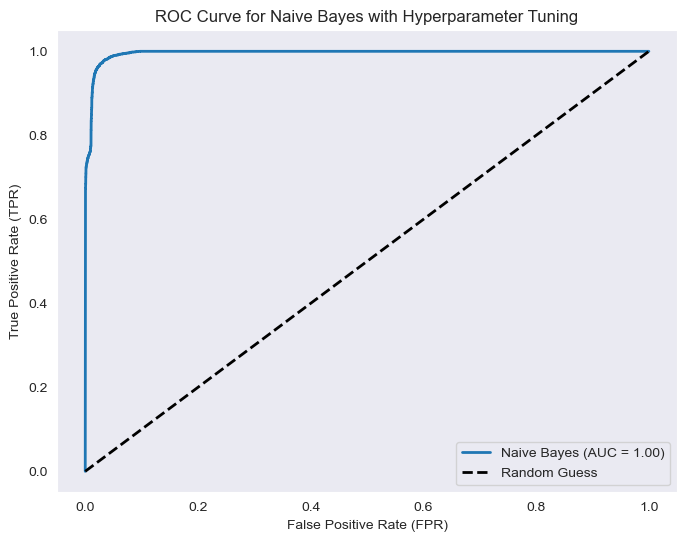

In [103]:
y_probs_dt_hyp = NB_HYP.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt_hyp)
auc_score = roc_auc_score(y_test, y_probs_dt_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

- **From above evaluation metrics the model is getting overfitted before hyperparameter and after hyperparameter tuning also, so this model is not used furture in this project.**

## SVM

In [104]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [105]:
# Predict on the test set
svc_y_pred= svc.predict(x_test)
# Predict on the train set
svc_y_pred_train = svc.predict(x_train)

# Evaluate the model for test set
svc_test_accuracy = round( accuracy_score(y_test, svc_y_pred),3)
svc_test_recall = round( recall_score(y_test, svc_y_pred),3)
svc_test_precision = round( precision_score(y_test, svc_y_pred),3)
svc_test_f1_score= round( f1_score(y_test, svc_y_pred),3)

print(f' Support Vector Machine  Testing : \n{'*'*70}')
print(f"Accuracy for test data: {svc_test_accuracy } ,\nRecall-Score for test data: {svc_test_recall},\nPrecision-Score for test data: {svc_test_precision},\nF1-Score for test data: {svc_test_f1_score}")

# Evaluate the model for train set
svc_train_accuracy = round( accuracy_score(y_train, svc_y_pred_train),3)
svc_train_recall = round( recall_score(y_train, svc_y_pred_train),3)
svc_train_precision = round( precision_score(y_train, svc_y_pred_train),3)
svc_train_f1_score = round( f1_score(y_train, svc_y_pred_train),3)

print(f'\n Support Vector Machine Training  : \n{'*'*70}')
print(f"Accuracy for train data: {svc_train_accuracy } ,\nRecall-Score for train data: {svc_train_recall},\nPrecision-Score for train data: {svc_train_precision},\nF1-Score for train data: {svc_train_f1_score}")


 Support Vector Machine  Testing : 
**********************************************************************
Accuracy for test data: 0.961 ,
Recall-Score for test data: 0.998,
Precision-Score for test data: 0.93,
F1-Score for test data: 0.962

 Support Vector Machine Training  : 
**********************************************************************
Accuracy for train data: 0.962 ,
Recall-Score for train data: 0.996,
Precision-Score for train data: 0.932,
F1-Score for train data: 0.963


In [106]:
# Metrics for both results
SVM_testing_metrics = {"Accuracy": svc_test_accuracy, "Recall-Score": svc_test_recall, "Precision-Score": svc_test_precision ,"F1-Score": svc_test_f1_score}
SVM_training_metrics = {"Accuracy": svc_train_accuracy, "Recall-Score": svc_train_recall, "Precision-Score": svc_train_precision ,"F1-Score": svc_train_f1_score} 

# Print side by side
print(f"{'SVM-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in SVM_testing_metrics:
    print(f"{key:<30}{SVM_testing_metrics[key]:<30}{SVM_training_metrics[key]:<20}")

SVM-Evalution Metric          Test Data                     Train Data                    
Accuracy                      0.961                         0.962               
Recall-Score                  0.998                         0.996               
Precision-Score               0.93                          0.932               
F1-Score                      0.962                         0.963               


In [107]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,svc_y_pred)}")
print(f"Classification report for training data:\n{classification_report(y_train,svc_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      8913
           1       0.93      1.00      0.96      8805

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     35310
           1       0.93      1.00      0.96     35560

    accuracy                           0.96     70870
   macro avg       0.96      0.96      0.96     70870
weighted avg       0.96      0.96      0.96     70870



### Decission Tree

In [108]:
# Building Decission Tree Model 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
# Predict on the test set
DT_y_pred = DT.predict(x_test)
# Predict on the train set
DT_y_pred_train = DT.predict(x_train)

# Evaluate the model for test set
DT_test_accuracy = round( accuracy_score(y_test, DT_y_pred),3)
DT_test_recall = round( recall_score(y_test, DT_y_pred),3)
DT_test_precision = round( precision_score(y_test, DT_y_pred),3)
DT_test_f1_score = round( f1_score(y_test, DT_y_pred),3)

print(f' Decission Tree Vector Machine  Testing : \n{'*'*70}')
print(f"Accuracy for test data: {DT_test_accuracy } ,\nRecall-Score for test data: {DT_test_recall},\nPrecision-Score for test data: {DT_test_precision},\nF1-Score for test data: {DT_test_f1_score}")

# Evaluate the model for train set
DT_train_accuracy = round( accuracy_score(y_train, DT_y_pred_train),3)
DT_train_recall = round( recall_score(y_train, DT_y_pred_train),3)
DT_train_precision = round( precision_score(y_train, DT_y_pred_train),3)
DT_train_f1_score = round( f1_score(y_train, DT_y_pred_train),3)

print(f'\n Decission Tree Training  : \n{'*'*70}')
print(f"Accuracy for train data: {DT_train_accuracy } ,\nRecall-Score for train data: {DT_train_recall},\nPrecision-Score for train data: {DT_train_precision},\nF1-Score for train data: {DT_train_f1_score}")


 Decission Tree Vector Machine  Testing : 
**********************************************************************
Accuracy for test data: 0.995 ,
Recall-Score for test data: 0.996,
Precision-Score for test data: 0.994,
F1-Score for test data: 0.995

 Decission Tree Training  : 
**********************************************************************
Accuracy for train data: 1.0 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 1.0,
F1-Score for train data: 1.0


In [110]:
# Metrics for both results
DT_testing_metrics = {"Accuracy": DT_test_accuracy, "Recall-Score": DT_test_recall, "Precision-Score": DT_test_precision ,"F1-Score": DT_test_f1_score}
DT_training_metrics = {"Accuracy": DT_train_accuracy, "Recall-Score": DT_train_recall, "Precision-Score": DT_train_precision ,"F1-Score": DT_train_f1_score} 

# Print side by side
print(f"{'DT-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in DT_testing_metrics:
    print(f"{key:<30}{DT_testing_metrics[key]:<30}{DT_training_metrics[key]:<20}")

DT-Evalution Metric           Test Data                     Train Data                    
Accuracy                      0.995                         1.0                 
Recall-Score                  0.996                         1.0                 
Precision-Score               0.994                         1.0                 
F1-Score                      0.995                         1.0                 


In [111]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,DT_y_pred)}\n {'**'* 30}")
print(f"Classification report for training data:\n{classification_report(y_train,DT_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8913
           1       0.99      1.00      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

 ************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



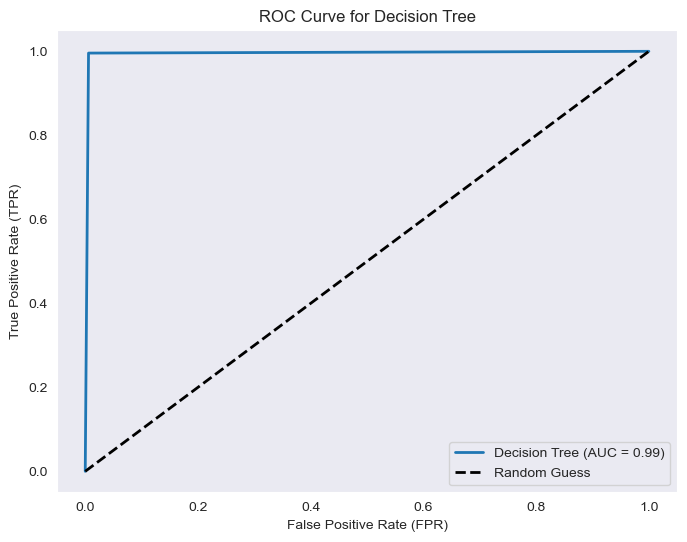

In [112]:
y_probs_dt = DT.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)
auc_score = roc_auc_score(y_test, y_probs_dt)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Hyperparameter Tuning for Decission Tree :

In [113]:
param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],        # Function to measure split quality
    'splitter': ['best', 'random'],                     # Strategy for splitting at each node
    'max_depth': [None, 3, 5, 10, 20],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],                # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],                  # Minimum samples in a leaf node
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],        # Minimum weighted fraction of the sum total of weights for a leaf
    'max_features': [None, 'sqrt', 'log2'],             # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 50, 100],          # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1],          # Minimum impurity decrease for a node split
    'ccp_alpha': [0.0, 0.01, 0.1],                      # Complexity parameter for Minimal Cost-Complexity Pruning
}

DT_grid_search = RandomizedSearchCV(DT, param_distributions, cv=5,verbose=2, scoring='accuracy',n_jobs=-1)
DT_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=2)

In [114]:
# Printing Best Parameters 
print("Best Parameters:", DT_grid_search.best_params_)

Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.1, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 3, 'criterion': 'log_loss', 'ccp_alpha': 0.1}


In [115]:
# Best Parameters  
DT_grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.1, criterion='log_loss', max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.1,
                       min_samples_leaf=2, min_weight_fraction_leaf=0.2)

In [116]:
DT_HYP=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, max_leaf_nodes=100,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.1)
DT_HYP.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, max_leaf_nodes=100,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.1)

In [117]:
# Predict on the test set
DT_y_pred_hyp = DT_HYP.predict(x_test)
# Predict on the train set
DT_y_pred_train_hyp = DT_HYP.predict(x_train)

# Evaluate the model for test set
DT_test_accuracy_hyp = round( accuracy_score(y_test, DT_y_pred_hyp),3)
DT_test_recall_hyp = round( recall_score(y_test, DT_y_pred_hyp),3)
DT_test_precision_hyp = round( precision_score(y_test, DT_y_pred_hyp),3)
DT_test_f1_score_hyp = round( f1_score(y_test, DT_y_pred_hyp),3)

print(f'Decission Tree Evalution Metrices After Tuning  : \n{'*'*70}')
print(f"Accuracy for test data: {DT_test_accuracy_hyp } ,\nRecall-Score for test data: {DT_test_recall_hyp},\nPrecision-Score for test data: {DT_test_precision_hyp},\nF1-Score for test data: {DT_test_f1_score_hyp}")

# Evaluate the model for train set
DT_train_accuracy_hyp = round( accuracy_score(y_train, DT_y_pred_train_hyp),3)
DT_train_recall_hyp = round( recall_score(y_train, DT_y_pred_train_hyp),3)
DT_train_precision_hyp = round( precision_score(y_train, DT_y_pred_train_hyp),3)
DT_train_f1_score_hyp = round( f1_score(y_train, DT_y_pred_train_hyp),3)

print(f'\n Decission Tree Training Evalution Metrices After Tuning : \n{'*'*70}')
print(f"Accuracy for train data: {DT_train_accuracy_hyp } ,\nRecall-Score for train data: {DT_train_recall_hyp},\nPrecision-Score for train data: {DT_train_precision_hyp},\nF1-Score for train data: {DT_train_f1_score_hyp}")


Decission Tree Evalution Metrices After Tuning  : 
**********************************************************************
Accuracy for test data: 0.952 ,
Recall-Score for test data: 1.0,
Precision-Score for test data: 0.911,
F1-Score for test data: 0.954

 Decission Tree Training Evalution Metrices After Tuning : 
**********************************************************************
Accuracy for train data: 0.953 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 0.915,
F1-Score for train data: 0.955


In [118]:
# Metrics for both results
DT_Hyp_testing_metrics = {"Accuracy": DT_test_accuracy_hyp, "Recall-Score": DT_test_recall_hyp, "Precision-Score": DT_test_precision_hyp ,"F1-Score": DT_test_f1_score_hyp}
DT_Hyp_training_metrics = {"Accuracy": DT_train_accuracy_hyp, "Recall-Score": DT_train_recall_hyp, "Precision-Score": DT_train_precision_hyp ,"F1-Score": DT_train_f1_score_hyp} 

# Print side by side
print(f"{'DT-HYP-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in KNN_Hyp_testing_metrics:
    print(f"{key:<30}{DT_Hyp_testing_metrics[key]:<30}{DT_Hyp_training_metrics[key]:<20}")

DT-HYP-Evalution Metric       Test Data                     Train Data                    
Accuracy                      0.952                         0.953               
Recall-Score                  1.0                           1.0                 
Precision-Score               0.911                         0.915               
F1-Score                      0.954                         0.955               


In [119]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,DT_y_pred_hyp)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,DT_y_pred_train_hyp)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      8913
           1       0.91      1.00      0.95      8805

    accuracy                           0.95     17718
   macro avg       0.96      0.95      0.95     17718
weighted avg       0.96      0.95      0.95     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     35310
           1       0.91      1.00      0.96     35560

    accuracy                           0.95     70870
   macro avg       0.96      0.95      0.95     70870
weighted avg       0.96      0.95      0.95     70870



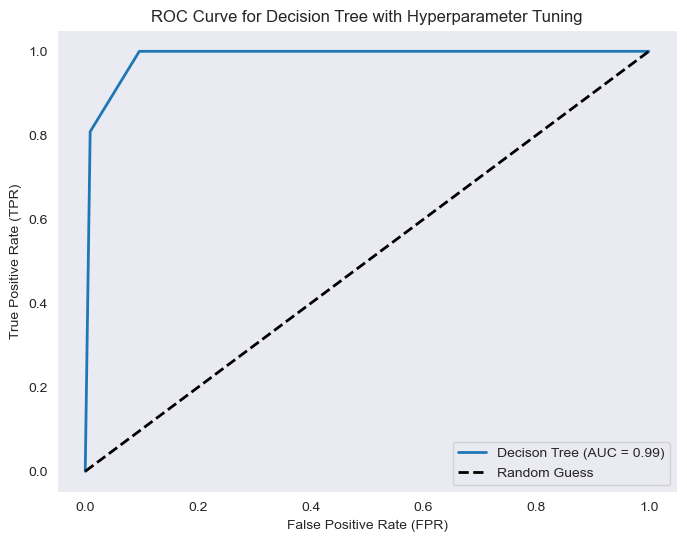

In [120]:
y_probs_dt_hyp = DT_HYP.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt_hyp)
auc_score = roc_auc_score(y_test, y_probs_dt_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decison Tree (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Random Forest :

In [121]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [122]:
# Predict on the test set
RF_y_pred = RF.predict(x_test)
# Predict on the train set
RF_y_pred_train = RF.predict(x_train)

# Evaluate the model for test set
RF_test_accuracy = round( accuracy_score(y_test, RF_y_pred),3)
RF_test_recall = round( recall_score(y_test, RF_y_pred),3)
RF_test_precision = round( precision_score(y_test, RF_y_pred),3)
RF_test_f1_score = round( f1_score(y_test, RF_y_pred),3)

print(f' Random Forest Testing : \n{'*'*70}')
print(f"Accuracy for test data: {RF_test_accuracy } ,\nRecall-Score for test data: {RF_test_recall},\nPrecision-Score for test data: {RF_test_precision},\nF1-Score for test data: {RF_test_f1_score}")

# Evaluate the model for train set
RF_train_accuracy = round( accuracy_score(y_train, RF_y_pred_train),3)
RF_train_recall = round( recall_score(y_train, RF_y_pred_train),3)
RF_train_precision = round( precision_score(y_train, RF_y_pred_train),3)
RF_train_f1_score = round( f1_score(y_train, RF_y_pred_train),3)

print(f'\n Random Forest Training  : \n{'*'*70}')
print(f"Accuracy for train data: {RF_train_accuracy } ,\nRecall-Score for train data: {RF_train_recall},\nPrecision-Score for train data: {RF_train_precision},\nF1-Score for train data: {RF_train_f1_score}")


 Random Forest Testing : 
**********************************************************************
Accuracy for test data: 0.999 ,
Recall-Score for test data: 0.999,
Precision-Score for test data: 0.998,
F1-Score for test data: 0.999

 Random Forest Training  : 
**********************************************************************
Accuracy for train data: 1.0 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 1.0,
F1-Score for train data: 1.0


In [123]:
# Metrics for both results
RF_testing_metrics = {"Accuracy": RF_test_accuracy, "Recall-Score": RF_test_recall, "Precision-Score": RF_test_precision ,"F1-Score": RF_test_f1_score}
RF_training_metrics = {"Accuracy": RF_train_accuracy, "Recall-Score": RF_train_recall, "Precision-Score": RF_train_precision ,"F1-Score": RF_train_f1_score} 

# Print side by side
print(f"{'RF-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in DT_testing_metrics:
    print(f"{key:<30}{RF_testing_metrics[key]:<30}{RF_training_metrics[key]:<20}")

RF-Evalution Metric           Test Data                     Train Data                    
Accuracy                      0.999                         1.0                 
Recall-Score                  0.999                         1.0                 
Precision-Score               0.998                         1.0                 
F1-Score                      0.999                         1.0                 


In [124]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,RF_y_pred)}")
print(f"Classification report for training data:\n{classification_report(y_train,RF_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718

Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



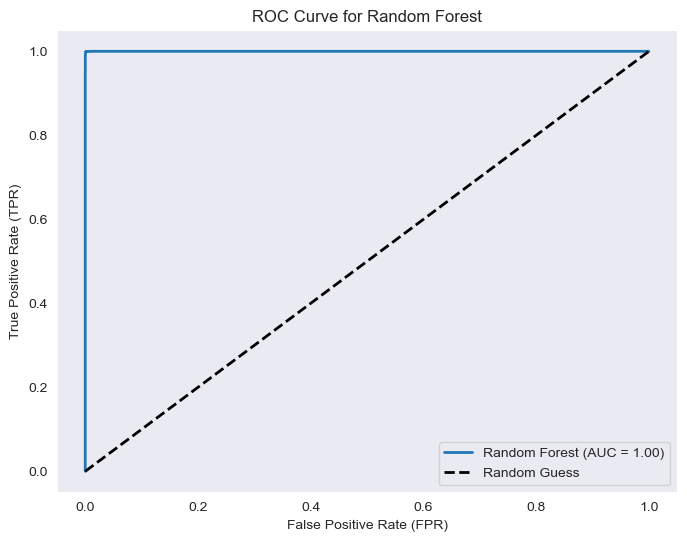

In [125]:
y_probs_rf = RF.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
auc_score = roc_auc_score(y_test, y_probs_rf)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Hyperparameter Tuning for Random Forest :

In [126]:
param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],        # Function to measure split quality
    'max_depth': [None, 3, 5, 10, 20],                  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],                # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],                  # Minimum samples in a leaf node
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],        # Minimum weighted fraction of the sum total of weights for a leaf
    'max_features': [None, 'sqrt', 'log2'],             # Number of features to consider when looking for the best split
    'max_leaf_nodes': [None, 10, 20, 50, 100],          # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1],          # Minimum impurity decrease for a node split
    'ccp_alpha': [0.0, 0.01, 0.1],                      # Complexity parameter for Minimal Cost-Complexity Pruning
}

RF_grid_search = RandomizedSearchCV(RF, param_distributions, cv=5,verbose=2, scoring='accuracy',n_jobs=-1)
RF_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.01, 0.1],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2]},
                   scoring='accuracy', verbose=2)

In [127]:
print("Best Parameters :", RF_grid_search.best_params_)

Best Parameters : {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 0.0}


In [128]:
# best_knn_model =
RF_grid_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=5)

In [129]:
RF_HYP=RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_features=None,
                       max_leaf_nodes=50, min_samples_leaf=10,
                       min_samples_split=10)
RF_HYP.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_features=None,
                       max_leaf_nodes=50, min_samples_leaf=10,
                       min_samples_split=10)

In [130]:
# Predict on the test set
RF_y_pred_hyp = RF_HYP.predict(x_test)
# Predict on the train set
RF_y_pred_train_hyp = RF_HYP.predict(x_train)

# Evaluate the model for test set
RF_test_accuracy_hyp = round( accuracy_score(y_test, RF_y_pred_hyp),3)
RF_test_recall_hyp = round( recall_score(y_test, RF_y_pred_hyp),3)
RF_test_precision_hyp = round( precision_score(y_test, RF_y_pred_hyp),3)
RF_test_f1_score_hyp = round( f1_score(y_test, RF_y_pred_hyp),3)

print(f'Rndom Forest Evalution Metrices After Tuning  : \n{'*'*70}')
print(f"Accuracy for test data: {RF_test_accuracy_hyp } ,\nRecall-Score for test data: {RF_test_recall_hyp},\nPrecision-Score for test data: {RF_test_precision_hyp},\nF1-Score for test data: {RF_test_f1_score_hyp}")

# Evaluate the model for train set
RF_train_accuracy_hyp = round( accuracy_score(y_train, RF_y_pred_train_hyp),3)
RF_train_recall_hyp = round( recall_score(y_train, RF_y_pred_train_hyp),3)
RF_train_precision_hyp = round( precision_score(y_train, RF_y_pred_train_hyp),3)
RF_train_f1_score_hyp = round( f1_score(y_train, RF_y_pred_train_hyp),3)

print(f'\n Random Forest Evalution Metrices After Tuning : \n{'*'*70}')
print(f"Accuracy for train data: {RF_train_accuracy_hyp } ,\nRecall-Score for train data: {RF_train_recall_hyp},\nPrecision-Score for train data: {RF_train_precision_hyp},\nF1-Score for train data: {RF_train_f1_score_hyp}")


Rndom Forest Evalution Metrices After Tuning  : 
**********************************************************************
Accuracy for test data: 0.979 ,
Recall-Score for test data: 0.969,
Precision-Score for test data: 0.988,
F1-Score for test data: 0.979

 Random Forest Evalution Metrices After Tuning : 
**********************************************************************
Accuracy for train data: 0.977 ,
Recall-Score for train data: 0.966,
Precision-Score for train data: 0.988,
F1-Score for train data: 0.977


In [131]:
# Metrics for both results
RF_Hyp_testing_metrics = {"Accuracy": RF_test_accuracy_hyp, "Recall-Score": RF_test_recall_hyp, "Precision-Score": RF_test_precision_hyp ,"F1-Score": RF_test_f1_score_hyp}
RF_Hyp_training_metrics = {"Accuracy": RF_train_accuracy_hyp, "Recall-Score": RF_train_recall_hyp, "Precision-Score": RF_train_precision_hyp ,"F1-Score": RF_train_f1_score_hyp} 

# Print side by side
print(f"{'RF-HYP-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in RF_Hyp_testing_metrics:
    print(f"{key:<30}{RF_Hyp_testing_metrics[key]:<30}{RF_Hyp_training_metrics[key]:<20}")

RF-HYP-Evalution Metric       Test Data                     Train Data                    
Accuracy                      0.979                         0.977               
Recall-Score                  0.969                         0.966               
Precision-Score               0.988                         0.988               
F1-Score                      0.979                         0.977               


In [132]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,RF_y_pred_hyp)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,RF_y_pred_train_hyp)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8913
           1       0.99      0.97      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35310
           1       0.99      0.97      0.98     35560

    accuracy                           0.98     70870
   macro avg       0.98      0.98      0.98     70870
weighted avg       0.98      0.98      0.98     70870



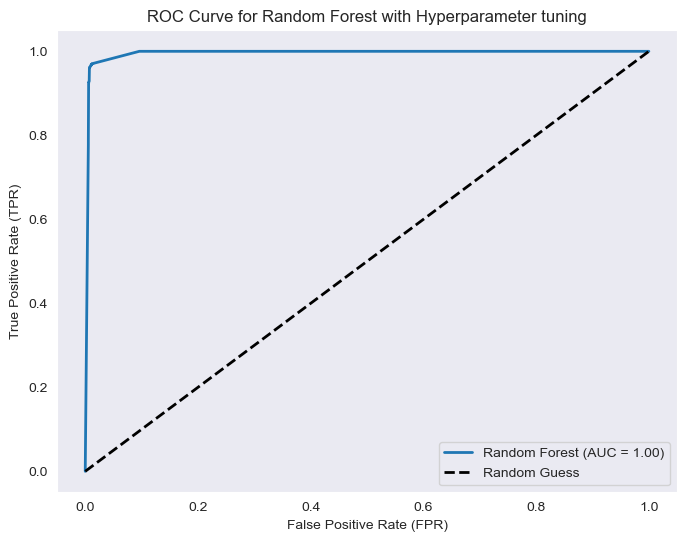

In [133]:
y_probs_rf_hyp = RF_HYP.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf_hyp)
auc_score = roc_auc_score(y_test, y_probs_rf_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest with Hyperparameter tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Extreme Gradient Boosting

In [134]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
# Predict on the test set
XGB_y_pred = XGB.predict(x_test)
# Predict on the train set
XGB_y_pred_train = XGB.predict(x_train)

# Evaluate the model for test set
XGB_test_accuracy = round( accuracy_score(y_test, XGB_y_pred),3)
XGB_test_recall = round( recall_score(y_test, XGB_y_pred),3)
XGB_test_precision = round( precision_score(y_test, XGB_y_pred),3)
XGB_test_f1_score = round( f1_score(y_test, XGB_y_pred),3)

print(f' Extreme Gradient Boosting Testing : \n{'*'*70}')
print(f"Accuracy for test data: {XGB_test_accuracy } ,\nRecall-Score for test data: {XGB_test_recall},\nPrecision-Score for test data: {XGB_test_precision},\nF1-Score for test data: {XGB_test_f1_score}")

# Evaluate the model for train set
XGB_train_accuracy = round( accuracy_score(y_train, XGB_y_pred_train),3)
XGB_train_recall = round( recall_score(y_train, XGB_y_pred_train),3)
XGB_train_precision = round( precision_score(y_train, XGB_y_pred_train),3)
XGB_train_f1_score = round( f1_score(y_train, XGB_y_pred_train),3)

print(f'\n Extreme Gradient Boosting Training  : \n{'*'*70}')
print(f"Accuracy for train data: {XGB_train_accuracy } ,\nRecall-Score for train data: {XGB_train_recall},\nPrecision-Score for train data: {XGB_train_precision},\nF1-Score for train data: {XGB_train_f1_score}")


 Extreme Gradient Boosting Testing : 
**********************************************************************
Accuracy for test data: 1.0 ,
Recall-Score for test data: 1.0,
Precision-Score for test data: 0.999,
F1-Score for test data: 1.0

 Extreme Gradient Boosting Training  : 
**********************************************************************
Accuracy for train data: 1.0 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 1.0,
F1-Score for train data: 1.0


In [136]:
# Metrics for both results
XGB_testing_metrics = {"Accuracy": XGB_test_accuracy, "Recall-Score": XGB_test_recall, "Precision-Score": XGB_test_precision ,"F1-Score": XGB_test_f1_score}
XGB_training_metrics = {"Accuracy": XGB_train_accuracy, "Recall-Score": XGB_train_recall, "Precision-Score": XGB_train_precision ,"F1-Score": XGB_train_f1_score} 

# Print side by side
print(f"{'XGB-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in XGB_testing_metrics:
    print(f"{key:<30}{XGB_testing_metrics[key]:<30}{XGB_training_metrics[key]:<20}")

XGB-Evalution Metric          Test Data                     Train Data                    
Accuracy                      1.0                           1.0                 
Recall-Score                  1.0                           1.0                 
Precision-Score               0.999                         1.0                 
F1-Score                      1.0                           1.0                 


In [137]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,XGB_y_pred)}\n {'***'*25}")
print(f"Classification report for training data:\n{classification_report(y_train,XGB_y_pred_train)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718

 ***************************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



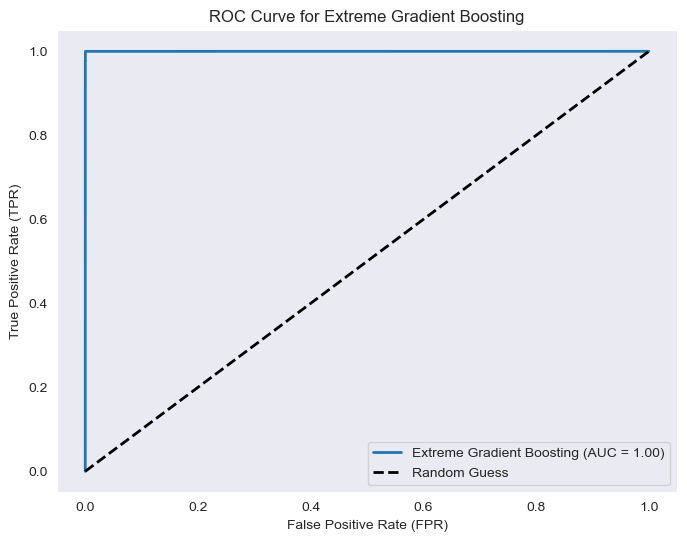

In [138]:
y_probs_xgb = XGB.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
auc_score = roc_auc_score(y_test, y_probs_xgb)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Extreme Gradient Boosting (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Extreme Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Hyperparameter Tuning for Extreme Gradient Boosting :

In [139]:
param_distributions = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [3, 5, 7, 9],                 # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Learning rate (eta)
    'min_child_weight': [1, 3, 5],             # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],               # Minimum loss reduction for a split
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features to randomly sample for each tree
    'subsample': [0.7, 0.8, 0.9, 1.0],         # Fraction of samples used for fitting individual trees
    'reg_alpha': [0, 0.01, 0.1],               # L1 regularization term on weights
    'reg_lambda': [0.1, 1, 10],                # L2 regularization term on weights
}

XGB_grid_search = RandomizedSearchCV(XGB, param_distributions, cv=5, scoring='accuracy',n_jobs=-1)
XGB_grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [140]:
print("Best Parameters:", XGB_grid_search.best_params_)

Best Parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [141]:
# Best 
XGB_grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
XGB_HYP=XGBClassifier(subsample = 1.0, reg_lambda = 10, reg_alpha = 0.01, n_estimators = 200, min_child_weight = 3, max_depth = 7, learning_rate = 0.1, gamma = 0.1, colsample_bytree = 0.7)
XGB_HYP.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
# Predict on the test set
XGB_y_pred_hyp = XGB_HYP.predict(x_test)
# Predict on the train set
XGB_y_pred_train_hyp = XGB_HYP.predict(x_train)

# Evaluate the model for test set
XGB_test_accuracy_hyp = round( accuracy_score(y_test, XGB_y_pred_hyp),3)
XGB_test_recall_hyp = round( recall_score(y_test, XGB_y_pred_hyp),3)
XGB_test_precision_hyp = round( precision_score(y_test, XGB_y_pred_hyp),3)
XGB_test_f1_score_hyp = round( f1_score(y_test, XGB_y_pred_hyp),3)

print(f'Rndom Forest Evalution Metrices After Tuning  : \n{'*'*70}')
print(f"Accuracy for test data: {XGB_test_accuracy_hyp } ,\nRecall-Score for test data: {XGB_test_recall_hyp},\nPrecision-Score for test data: {XGB_test_precision_hyp},\nF1-Score for test data: {XGB_test_f1_score_hyp}")

# Evaluate the model for train set
XGB_train_accuracy_hyp = round( accuracy_score(y_train, XGB_y_pred_train_hyp),3)
XGB_train_recall_hyp = round( recall_score(y_train, XGB_y_pred_train_hyp),3)
XGB_train_precision_hyp = round( precision_score(y_train, XGB_y_pred_train_hyp),3)
XGB_train_f1_score_hyp = round( f1_score(y_train, XGB_y_pred_train_hyp),3)

print(f'\n Random Forest Evalution Metrices After Tuning : \n{'*'*70}')
print(f"Accuracy for train data: {XGB_train_accuracy_hyp } ,\nRecall-Score for train data: {XGB_train_recall_hyp},\nPrecision-Score for train data: {XGB_train_precision_hyp},\nF1-Score for train data: {XGB_train_f1_score_hyp}")


Rndom Forest Evalution Metrices After Tuning  : 
**********************************************************************
Accuracy for test data: 1.0 ,
Recall-Score for test data: 1.0,
Precision-Score for test data: 0.999,
F1-Score for test data: 1.0

 Random Forest Evalution Metrices After Tuning : 
**********************************************************************
Accuracy for train data: 1.0 ,
Recall-Score for train data: 1.0,
Precision-Score for train data: 1.0,
F1-Score for train data: 1.0


In [144]:
# Metrics for both results
XGB_Hyp_testing_metrics = {"Accuracy": XGB_test_accuracy_hyp, "Recall-Score": XGB_test_recall_hyp, "Precision-Score": XGB_test_precision_hyp ,"F1-Score": XGB_test_f1_score_hyp}
XGB_Hyp_training_metrics = {"Accuracy": XGB_train_accuracy_hyp, "Recall-Score": XGB_train_recall_hyp, "Precision-Score": XGB_train_precision_hyp ,"F1-Score": XGB_train_f1_score_hyp} 

# Print side by side
print(f"{'XGB-HYP-Evalution Metric':<30}{'Test Data':<30}{'Train Data':<30}")
for key in XGB_Hyp_testing_metrics:
    print(f"{key:<30}{XGB_Hyp_testing_metrics[key]:<30}{XGB_Hyp_training_metrics[key]:<20}")

XGB-HYP-Evalution Metric      Test Data                     Train Data                    
Accuracy                      1.0                           1.0                 
Recall-Score                  1.0                           1.0                 
Precision-Score               0.999                         1.0                 
F1-Score                      1.0                           1.0                 


In [145]:
# Classification report
print(f"Classification report for testing data:\n{classification_report(y_test,XGB_y_pred_hyp)}")
print("*"*70)
print(f"Classification report for training data:\n{classification_report(y_train,XGB_y_pred_train_hyp)}")

Classification report for testing data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8913
           1       1.00      1.00      1.00      8805

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718

**********************************************************************
Classification report for training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35310
           1       1.00      1.00      1.00     35560

    accuracy                           1.00     70870
   macro avg       1.00      1.00      1.00     70870
weighted avg       1.00      1.00      1.00     70870



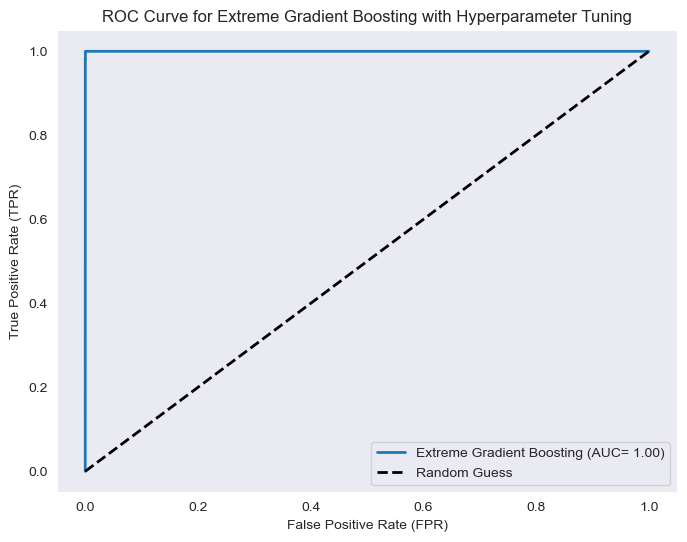

In [146]:
y_probs_xgb_hyp = XGB_HYP.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb_hyp)
auc_score = roc_auc_score(y_test, y_probs_xgb_hyp)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Extreme Gradient Boosting (AUC= {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Extreme Gradient Boosting with Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### ANN

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [148]:
# Build the MLP model
model = Sequential([
    Dense(10, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


In [149]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 863 (3.37 KB)

 Trainable params: 863 (3.37 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9320 - loss: 0.1689 - val_accuracy: 0.9924 - val_loss: 0.0209
Epoch 2/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0171 - val_accuracy: 0.9954 - val_loss: 0.0149
Epoch 3/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9942 - val_loss: 0.0159
Epoch 4/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9962 - val_loss: 0.0121
Epoch 5/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9964 - val_loss: 0.0121
Epoch 6/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9966 - val_loss: 0.0119
Epoch 7/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0120 - val_accuracy: 0.9965 - val_loss: 0.0115
Epoch 8/50
2215/2215 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9966 - loss: 0.0107 - 

In [ ]:
# Evaluate the model
loss, annaccuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {annaccuracy:.12f}")

In [ ]:

# Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int64")
print(classification_report(y_test, y_pred))

In [ ]:
# Function to plot training and validation accuracy/loss
def plot_training_history(history):
    # Extract data from the history object
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

- The training accuracy (blue line) increases rapidly and quickly stabilizes around 99.5%, suggesting a well-trained model.
- Validation accuracy (orange line) closely follows the training accuracy, maintaining a similar level with no significant divergence.
- The training loss (blue line) decreases rapidly, stabilizing at a very low value (~0.005).
- The validation loss (orange line) is slightly higher than the training loss but remains consistently low throughout the training process.
- Both accuracy and loss plots suggest that the model is performing exceptionally well, with extremely high accuracy and very low loss.
- consistent trends in both training and validation metrics confirm a well-optimized model with good generalization capabilities.

## CONCLUSION

In [ ]:
models=['LogisticRegression','K Nearest Neighbors','SVM','Decision Tree','Random Forest','XGBoost','ANN']
accuracy_scores=[ accuracy_score(y_test, Lr_y_pred_test),accuracy_score(y_test, knn_y_pred),accuracy_score(y_test, svc_y_pred),accuracy_score(y_test, DT_y_pred_hyp),accuracy_score(y_test, RF_y_pred),accuracy_score(y_test, XGB_y_pred),annaccuracy]

In [ ]:
plt.figure(figsize=(15, 6))
bar_plot = sns.barplot(x=models, y=accuracy_scores,width=0.5,palette="muted")
plt.title('Model Accuracy Comparison')

# Add labels to the top of each bar
for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Model Comparison Report:  


#### Logistic Regression:
- **Accuracy Score :** 0.9507280731459533
- **Precission Score :**  0.9361117220145151
- **Recall Score :** 0.9668370244179444
- **F1-Score :**  0.9512263254930443
  
Logistic regression is known for its simplicity and interpretability, making it easy to understand and implement.  

#### K-Nearest Neighbor:
- **Accuracy Score :** 0.9971215712834406
- **Precission Score :** 0.9993160054719562
- **Recall Score :** 0.9950028392958546
- **F1-Score :** 0.9974398361495136

KNN is able to handle  the non-linear relationships in data without making strong assumptions.  

#### Support Vector Machine:
- **Accuracy Score :** 0.9961056552658314
- **Precission Score :** 0.9972677595628415
- **Recall Score :** 0.9948892674616695
- **F1-Score :** 0.9960770936380693

SVM's are effective in high-dimensional spaces and can handle non-linear relationships.  

#### Decission Tree:
- **Accuracy Score :** 0.9517439891635625
- **Precission Score :** 0.9114906832298136
- **Recall Score :** 1.0
- **F1-Score :** 0.9536961819658814

Decision trees may be prone to overfitting, and their interpretability is a strength.  

#### Random Forest:
- **Accuracy Score :** 0.9987583248673665
- **Precission Score :** 0.9994321408290744
- **Recall Score :** 0.9994321408290744
- **F1-Score :**  0.9987515605493134

Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.  

#### XG-Boost:
- **Accuracy Score :**  0.9996049215487075
- **Precission Score :** 0.9994323342415985
- **Recall Score :** 0.9997728563316297
- **F1-Score :** 0.9996025662862659

XGBoost is a powerful boosting algorithm known for its efficiency and performance.

#### ANN:
- **Accuracy Score :** 0.9971  
An Artificial Neural Network (ANN) is a versatile machine learning model inspired by the human brain, known for its ability to learn complex patterns and relationships in data through layers of interconnected neurons

### Challenges faced :
- **Outlier Handling:** While investigating outliers, we applied Winsorization to cap extreme values. However, this technique disproportionately affected a significant portion of genuine data points, leading to an undesirable loss of valuable information. Since the dataset had only a few outliers, we decided to retain them rather than risk altering meaningful trends.

- **Feature Selection:** Some features, particularly wrist-related columns, contributed heavily to overfitting. A careful study of feature distributions and their correlations with target variables helped us make informed decisions on feature selection.

- **Scaling & Overfitting:** RNNs showed extreme overfitting without scaling; after applying MinMax Scaler, the model achieved better generalization.
  
- **Algorithmic Overfitting:** Many models struggled with overfitting despite tuning; ensemble methods and regularization helped mitigate this issue.
  
- **Computational Constraints:** Deep learning models required high computational power, leading to optimizations like batch processing, early stopping, and efficient memory management.

## Result 

**XGBoost provides the most reliable, efficient, and scalable solution for detecting walking and running activities. Its superior performance over other models makes it the ideal candidate for real-time deployment, ensuring high accuracy with minimal resource consumption. We strongly recommend moving forward with XGBoost deployment to enhance the client’s activity recognition system while maintaining scalability and robustness.**